### Load packages

In [464]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

import random

## Load data

In [383]:
df = pd.read_csv("credit_risk_dataset.csv")

## Variable names and descriptions

- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
  - A: The borrower has a high creditworthiness, indicating low risk.
  - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
  - C: The borrower's creditworthiness is moderate.
  - D: The borrower is considered to have higher risk compared to previous grades.
  - E: The borrower's creditworthiness is lower, indicating a higher risk.
  - F: The borrower poses a significant credit risk.
  - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
  - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
  - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
  - Y: The individual has a history of defaults on their credit file.
  - N: The individual does not have any history of defaults.
- cb_preson_cred_hist_length: The length of credit history for the individual.

## Basic data information

In [384]:
df.shape

(32581, 12)

In [385]:
#Target variable counts
df["loan_status"].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [386]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [388]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [389]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [390]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## Data exploration

### Numerical variables

In [391]:
n_vars = [x for x in df.columns.to_list() if df[x].dtype == "int64" or df[x].dtype == "float64"]

#### Box plot

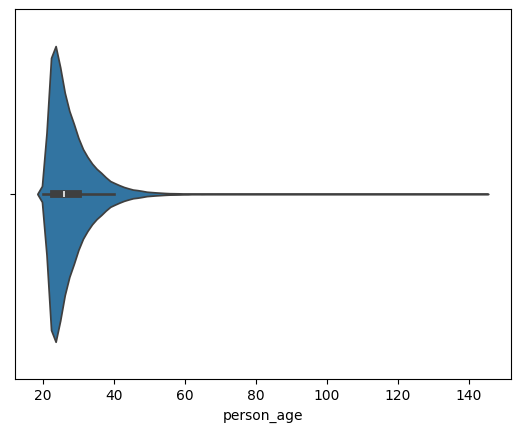

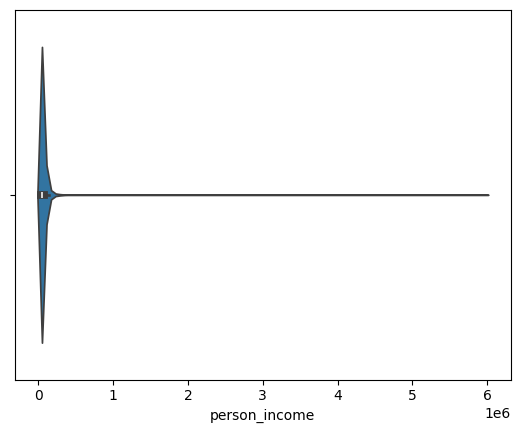

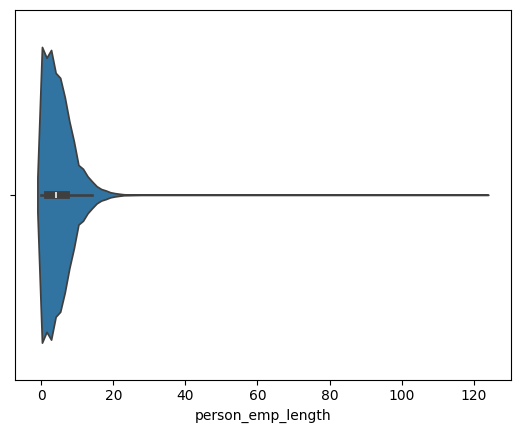

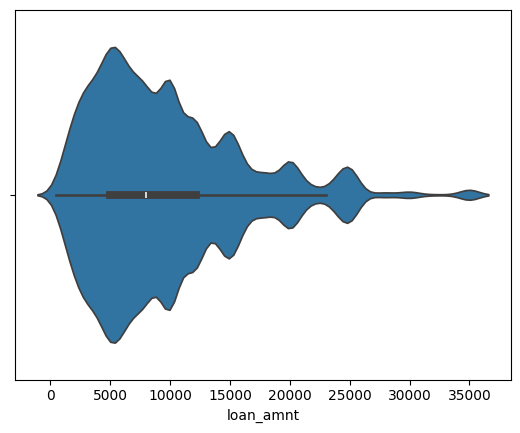

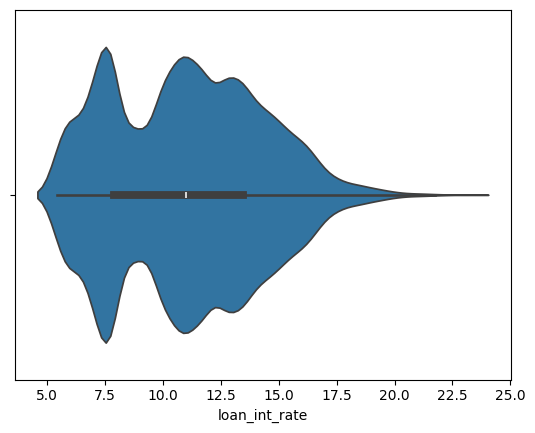

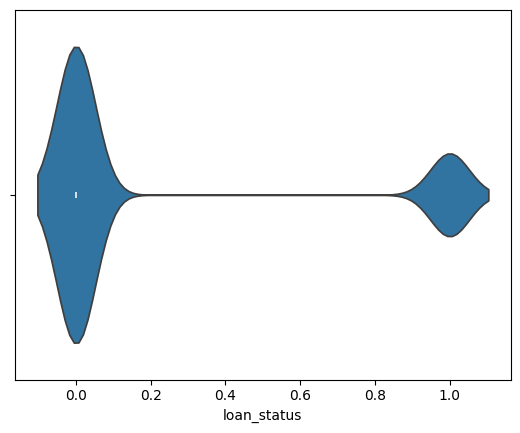

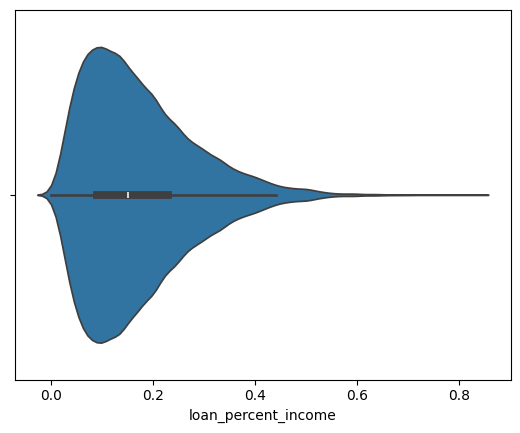

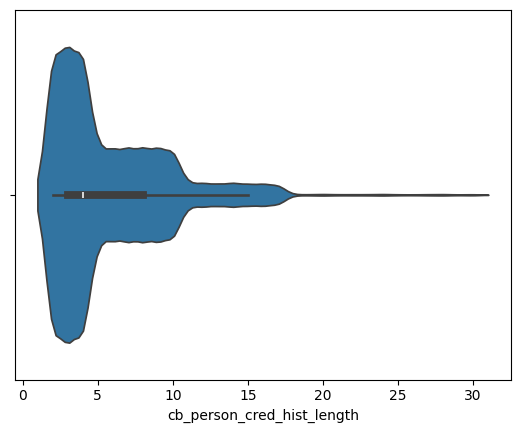

In [392]:
for col in n_vars:
    fig, ax = plt.subplots()
    sns.violinplot(df, x = col, ax = ax)

#### hist plot

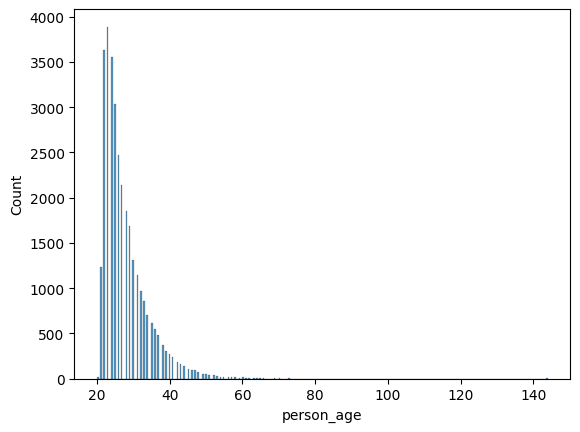

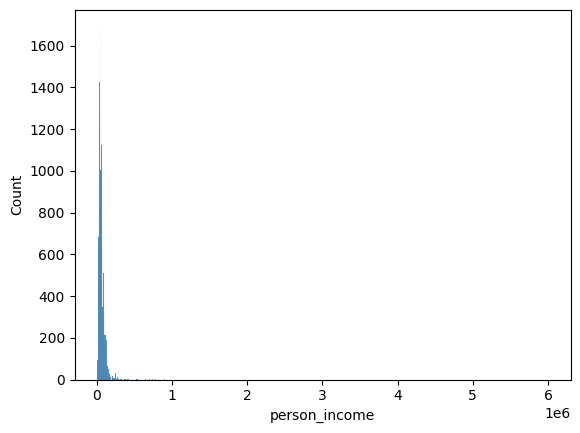

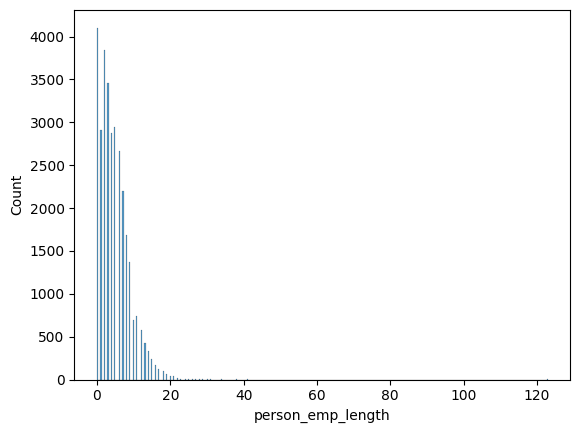

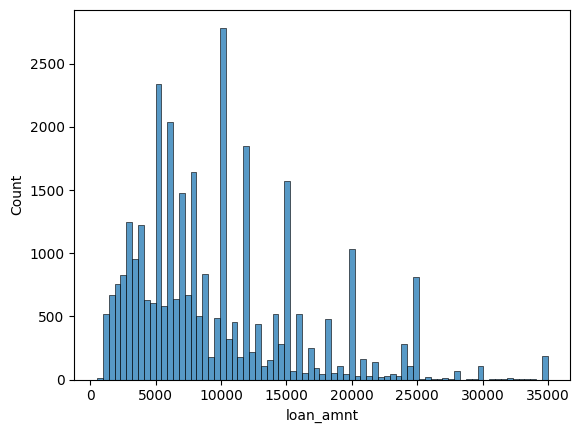

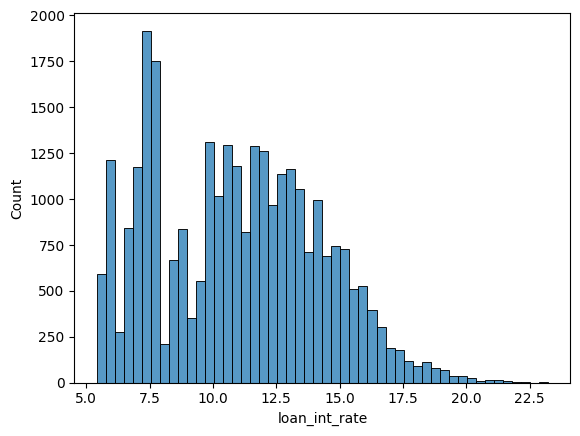

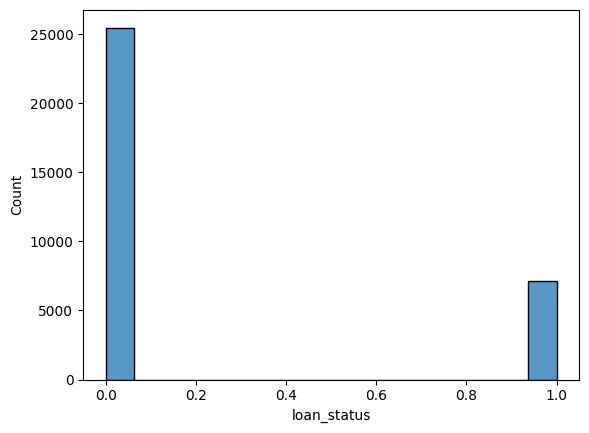

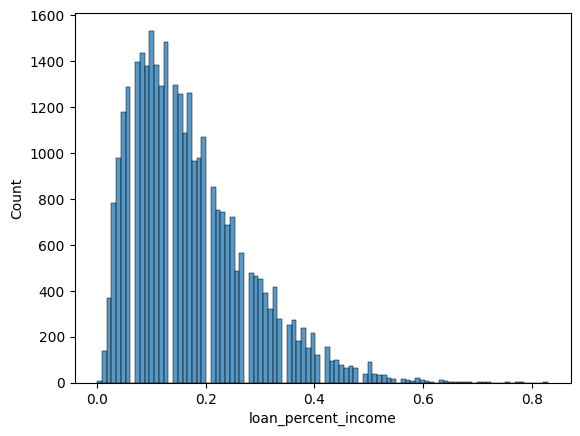

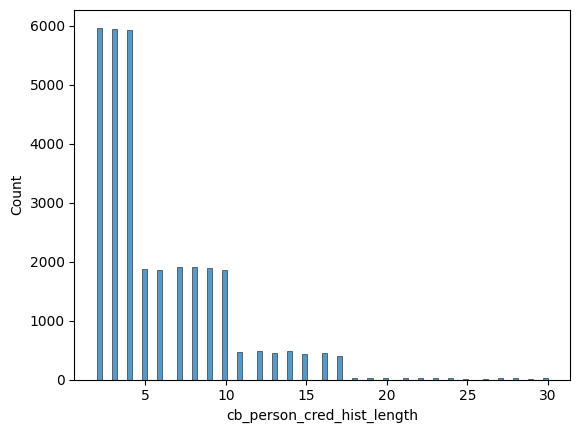

In [393]:
for col in n_vars:
    fig, ax = plt.subplots()
    sns.histplot(df, x = col, ax =ax)

#### loan_percent_income

718 31863


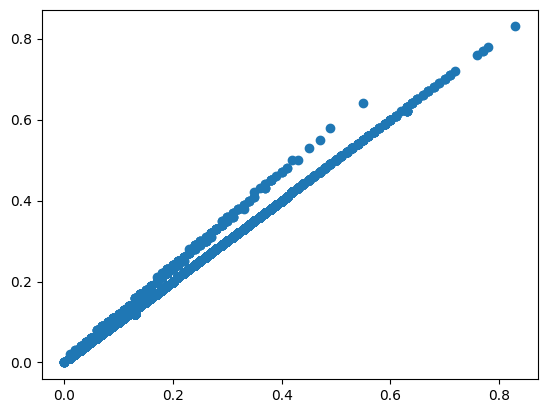

In [394]:
#We have loan_amount and person_income. Lets reconstruct the loan_percent_income variable to check for accuracy

df["loan_percent_income_new"] = df["loan_amnt"]/df["person_income"]

#it appears they rounded it, so lets do the same to compare
df["loan_percent_income_new"] = df["loan_percent_income_new"].apply(lambda x: round(x, 2))

plt.scatter(df["loan_percent_income"], df["loan_percent_income_new"])

#The majority of cases are equal but some are not. We cannot comfirm if this is intnetional or not.
#Lets overwrite the column with the recomputed values as we cannot comfirm with experts. 
print(len(df[df["loan_percent_income_new"]!=df["loan_percent_income"]]), len(df[df["loan_percent_income_new"]==df["loan_percent_income"]]))

df["loan_percent_income"] = df["loan_percent_income_new"]

df = df.drop(columns = ["loan_percent_income_new"])

### Categorical variables

In [395]:
c_vars = [x for x in df.columns.to_list() if df[x].dtype == "object"]

#### Countplot

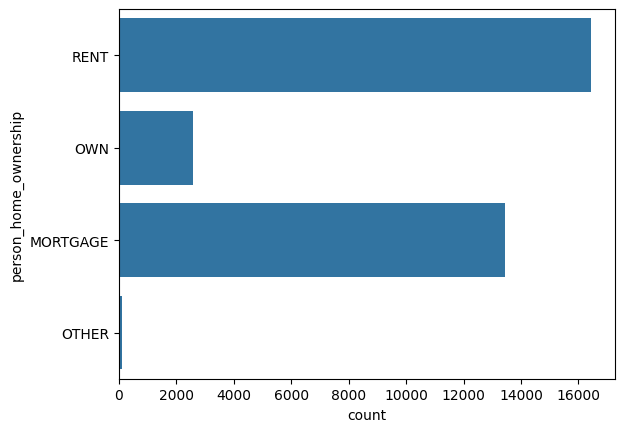

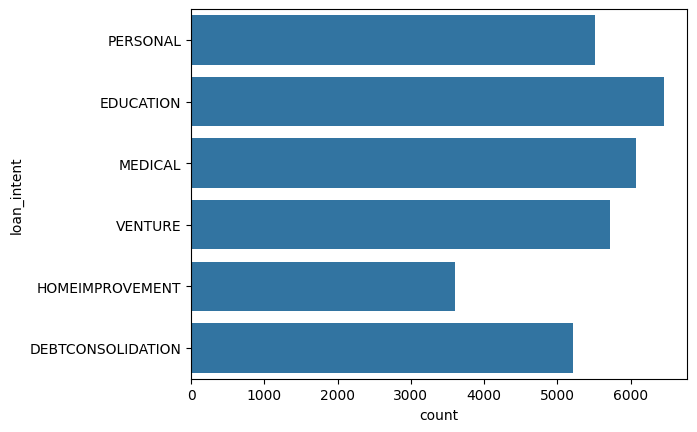

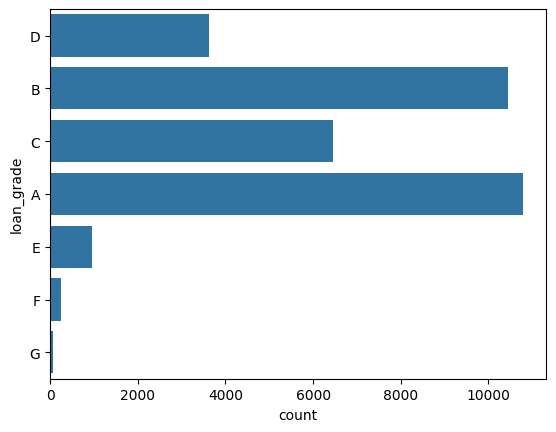

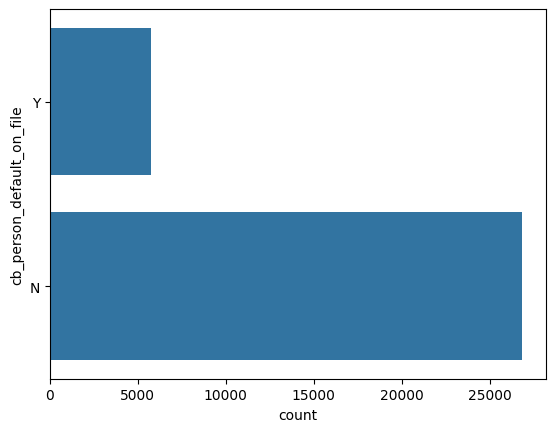

In [396]:
for col in c_vars:
    fig, ax = plt.subplots()
    sns.countplot(df[col], ax = ax)

## Data treatment

In [397]:
df_clean = df.copy()

### person_age

In [398]:
df_clean[df_clean["person_age"]>80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25
32416,94,24000,RENT,1.0,MEDICAL,C,6500,NaN,0,0.27,N,27
32506,84,94800,MORTGAGE,2.0,PERSONAL,A,10000,7.51,0,0.11,N,24


In [399]:
#Clearly there are some incorrect fields here with person age > 100 years. We will remove these rows
#Note, for IRB modelling, this would require more investigation as one cannot simply remove data without
#strong justification

df_clean = df_clean[df_clean["person_age"]<100]

### person_emp_length

In [400]:
df_clean[df_clean["person_emp_length"]>df_clean["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [401]:
#We notice there are some invalid values for age/employment length. We will remove these rows.
#We remove cases where emp_length is greater than person_age

#we need to be careful how we do it, because person_emp_length contains missing values and we 
#dont want to lose the rows with missing values for person_emp_length
df_clean = df_clean[(df_clean["person_emp_length"].isnull()) | 
                    (df_clean["person_emp_length"] < df_clean["person_age"])]

### cb_person_cred_hist_length

In [402]:
df_clean[df_clean["cb_person_cred_hist_length"]>df_clean["person_age"]]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [403]:
df_clean[df_clean["cb_person_cred_hist_length"]>80]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


### person_income

In [404]:
#from histogram, we see person_income has some large values. Lets investigate further.
df_clean[df_clean["person_income"]>1000000]

#We have some largue annual incomes greater than 1m, with a small loan amount. This
#is unlikely. We would need to comfirm this with stakeholders to check the reliability 
#of this information but we can't. Therefore, I will assume they are correct.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,N,8
29119,36,1200000,OWN,16.0,MEDICAL,A,10000,6.54,0,0.01,N,11
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,NaN,0,0.01,N,16
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.00,Y,15
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.00,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0,0.01,N,30
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,NaN,0,0.00,N,21


### missing values

In [405]:
df_clean.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [406]:
#Starting with person_emp_length
df_clean[df_clean["person_emp_length"].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [407]:
#Missing values appear valid and therefore require treatment. We must choose imputation method
#carefully since if we choose the median, we may have cases where the person_age is greater median person_emp_length

#Lets try median based on buckets of person_age for a more accurate imputation
df_clean["person_age_bucket"] = pd.cut(df_clean["person_age"], bins = [0, 30, 40, 50, 60, 70, 100])

#Number of observations per bucket to see if appropriate for computing median
print(df_clean["person_age_bucket"].value_counts())

#better to merge bucket 60-70 with 70-100 based on number of observations
df_clean["person_age_bucket"] = pd.cut(df_clean["person_age"], bins = [0, 30, 40, 50, 60, 100])

median_values = df_clean.groupby("person_age_bucket")["person_emp_length"].median()

print(median_values)

#compare with median of entire column
print(df_clean["person_emp_length"].median())

#It turns out both methods lead to the same result (apart from final bucket). The median will always be less than person_age as min age is 20.
#Therefore, we can impute missing values with median of entire column, but it is good we checked.
df_clean["person_emp_length"] = df_clean["person_emp_length"].fillna(df_clean["person_emp_length"].median())

df_clean = df_clean.drop(columns = ["person_age_bucket"])

person_age_bucket
(0, 30]      24822
(30, 40]      6263
(40, 50]      1206
(50, 60]       218
(60, 70]        57
(70, 100]        8
Name: count, dtype: int64
person_age_bucket
(0, 30]      4.0
(30, 40]     4.0
(40, 50]     4.0
(50, 60]     4.0
(60, 100]    3.0
Name: person_emp_length, dtype: float64
4.0


/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/4279498922.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df_clean.groupby("person_age_bucket")["person_emp_length"].median()


In [408]:
#Now for loan_int_rate
df_clean[df_clean["loan_int_rate"].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4


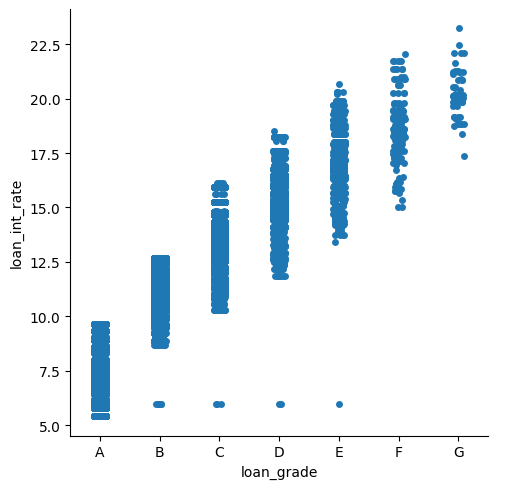

In [409]:
#Missings seem valued and we need to impute.
#Lets see if there is a relationship between loan_grade and loan_int_rate
sns.catplot(data=df_clean, x = "loan_grade", y="loan_int_rate", order = ["A", "B", "C", "D", "E", "F", "G"])

#clearly from plot, each loan grade has a range of interest rates. We can impute missing values based on median of loan_grade.
median_values = df_clean.groupby("loan_grade")["loan_int_rate"].median()

df_clean["loan_int_rate"] = df_clean.apply(
    lambda row: median_values[row["loan_grade"]] if pd.isnull(row["loan_int_rate"]) else row["loan_int_rate"], 
    axis=1
)

## Risk driver construction

In [410]:
df_model = df_clean.copy()

### Categorical drivers

In [411]:
#It also makes sense to make one numerical column from loan_grade, as we know A, B C, is a linear order in terms of risk
df_model["loan_grade_driver"] = df_model["loan_grade"].apply(lambda x: ord(x) - ord("A"))

#For each categorical variable, lets make a dummy variable for each category
df_model = pd.get_dummies(df_model, columns = c_vars, dtype=float)

### Numeric drivers

In [412]:
#Lets try a bucket transformation for numerical variables that make sense to be in buckets

#No need to bucket ones related to interest rate, as we have already seen each loan grade has a distinct range of interest rates
bucket_cols = [
    "person_income",
    "loan_amnt",
    "loan_percent_income"
]

for col in bucket_cols:
    df_model[col + "_bucket"] = pd.cut(df_model[col], bins = 10)
    #check size of bucket columns
    print(df_model[col + "_bucket"].value_counts())


person_income_bucket
(1964.216, 207578.4]      32166
(207578.4, 411156.8]        334
(411156.8, 614735.2]         40
(614735.2, 818313.6]         18
(818313.6, 1021892.0]         8
(1021892.0, 1225470.4]        3
(1836205.6, 2039784.0]        2
(1225470.4, 1429048.8]        1
(1429048.8, 1632627.2]        1
(1632627.2, 1836205.6]        1
Name: count, dtype: int64
loan_amnt_bucket
(3950.0, 7400.0]      9456
(7400.0, 10850.0]     7361
(465.5, 3950.0]       5123
(10850.0, 14300.0]    3912
(14300.0, 17750.0]    2863
(17750.0, 21200.0]    1925
(24650.0, 28100.0]     925
(21200.0, 24650.0]     672
(31550.0, 35000.0]     212
(28100.0, 31550.0]     125
Name: count, dtype: int64
loan_percent_income_bucket
(0.083, 0.166]       10705
(-0.00083, 0.083]     7534
(0.166, 0.249]        7293
(0.249, 0.332]        4311
(0.332, 0.415]        1712
(0.415, 0.498]         679
(0.498, 0.581]         259
(0.581, 0.664]          60
(0.664, 0.747]          16
(0.747, 0.83]            5
Name: count, dtype: int

In [413]:
#Clearly we need to make a restriction for the mimunum number of observations per bucket

def create_bins(df, column, desired_bins, min_size):
    """
    Create quantile-based bins for a numerical column in a DataFrame while ensuring 
    each bin has at least `min_size` observations. If a bin has fewer than `min_size` 
    observations, it merges with the adjacent bin. The first bin always starts from 0.

    Parameters
    ----------
    df : pd.DataFrame 
        The input DataFrame.
    column : str
        The name of the numerical column to bin.
    desired_bins : int
        The desired number of bins to create.
    min_size : int
        The minimum number of observations required in each bin.

    Returns
    -------
    tuple (pd.DataFrame, list)
        A tuple containing:
        - DataFrame with a new column `<column>_bucket` representing the bins as integers.
        - A list of bucket splits.
    """
    
    # Step 1: Create the initial quantile-based bins using pd.qcut
    df[f'{column}_bucket'] = pd.qcut(df[column], q=desired_bins, duplicates='drop')
    
    # Step 2: Adjust the first bin to start at 0
    bin_edges = df[f'{column}_bucket'].cat.categories
    new_edges = [(0, bin_edges[0].right)] + [(bin_edges[i].left, bin_edges[i].right) for i in range(1, len(bin_edges))]
    
    # Step 3: Create new bin intervals
    new_bins = [pd.Interval(left, right, closed='right') for left, right in new_edges]

    # Step 4: Apply the adjusted bins
    df[f'{column}_bucket'] = pd.cut(df[column], bins=new_bins, include_lowest=True)

    # Step 5: Merge bins if count is below min_size
    bin_counts = df[f'{column}_bucket'].value_counts().sort_index()

    while any(bin_counts < min_size):
        small_bin = bin_counts[bin_counts < min_size].index[0]
        idx = list(bin_counts.index).index(small_bin)

        # Merge bins
        if idx > 0:
            new_bin = pd.Interval(left=bin_counts.index[idx-1].left, right=bin_counts.index[idx].right, closed='right')
            new_bins[idx-1] = new_bin
            del new_bins[idx]
        else:
            new_bin = pd.Interval(left=bin_counts.index[idx].left, right=bin_counts.index[idx+1].right, closed='right')
            new_bins[idx] = new_bin
            del new_bins[idx+1]

        # Reapply bins
        df[f'{column}_bucket'] = pd.cut(df[column], bins=new_bins, include_lowest=True)
        bin_counts = df[f'{column}_bucket'].value_counts().sort_index()

    # Convert bucket intervals to ordered integer labels
    bin_mapping = {interval: idx for idx, interval in enumerate(new_bins)}
    df[f'{column}_bucket'] = df[f'{column}_bucket'].map(bin_mapping)

    # Extract final bucket edges
    final_bucket_splits = [interval.right for interval in new_bins]

    return df, final_bucket_splits

#Lets try 100
final_bucket_splits = {}
for col in bucket_cols:
    df_model, split = create_bins(df_model, col, 10, 100)
    final_bucket_splits[col] = split
    #check size of bucket columns
    print(df_model[col + "_bucket"].value_counts())


person_income_bucket
2    3532
1    3372
7    3259
0    3258
6    3254
9    3253
8    3236
4    3207
5    3189
3    3014
Name: count, dtype: int64
loan_amnt_bucket
5    4724
0    3982
4    3769
3    3254
9    3251
8    3238
2    3236
6    2882
1    2561
7    1677
Name: count, dtype: int64
loan_percent_income_bucket
1    4096
4    3747
0    3430
5    3307
8    3160
9    3155
3    2950
2    2920
7    2914
6    2887
Name: count, dtype: int64


## Model development

### Train / Test split

In [414]:
#We need a split of 80/20, but we want to ensure it is balanced based on the target variable "loan_status"

#We can do this with a function, which searches for train and test splits that are balanced

def train_test_split_balanced(df, target_col, diff_threshold=0.01, test_size=0.2, random_state=None):
    """
    Split the DataFrame into train and test sets while ensuring that the difference in the mean of the target variable
    between the train and test sets is below a given threshold. The split is performed repeatedly if the difference 
    exceeds the threshold, using different random states.

    Parameters
    ----------
    df : pandas.DataFrame
        The DataFrame to split.
    target_col : str
        The name of the target column to balance.
    diff_threshold : float, optional, default=0.01
        The maximum allowed absolute difference in the mean of the target column between the train and test sets.
    test_size : float, optional, default=0.2
        The proportion of the data to include in the test set (between 0.0 and 1.0).
    random_state : int, optional, default=None
        The seed used by the random number generator for reproducibility. If None, a random seed will be chosen.

    Returns
    -------
    train : pandas.DataFrame
        The training set with balanced target variable distribution.
    test : pandas.DataFrame
        The test set with balanced target variable distribution.
    """
    
    # If no random_state is provided, generate one
    if random_state is None:
        random_state = random.randint(1, 10000000)

    # Step 1: Make a train, test split based on the random seed
    train, test = train_test_split(df, test_size=test_size, random_state=random_state)

    # Step 2: Compute the average of the target column for train and test sets
    train_target = train[target_col].mean()
    test_target = test[target_col].mean()

    # Step 3: Check if the absolute difference in target means is within the acceptable threshold
    while abs(train_target - test_target) > diff_threshold:
        print(f"Random state {random_state} has abs difference of {abs(train_target - test_target):.4f}", " which is greater than threshold of ", diff_threshold, ". Searching for new random state.")  
        # Generate a new random state if the difference exceeds the threshold
        random_state = random.randint(1, 10000000)
        train, test = train_test_split(df, test_size=test_size, random_state=random_state)
        train_target = train[target_col].mean()
        test_target = test[target_col].mean()

    print(f"Random state {random_state} has abs difference of {abs(train_target - test_target):.4f}. Search complete.")

    return train, test

train, test = train_test_split_balanced(df_model, "loan_status", diff_threshold = 0.001, test_size = 0.2, random_state = None)
    

Random state 5093061 has abs difference of 0.0066  which is greater than threshold of  0.001 . Searching for new random state.
Random state 9777602 has abs difference of 0.0003. Search complete.


In [415]:
riskdriver_num_columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length']

riskdriver_cat_columns = [
    'person_home_ownership_MORTGAGE',
    'person_home_ownership_OTHER',
    'person_home_ownership_OWN',
    'person_home_ownership_RENT',
    'loan_intent_DEBTCONSOLIDATION',
    'loan_intent_EDUCATION',
    'loan_intent_HOMEIMPROVEMENT',
    'loan_intent_MEDICAL',
    'loan_intent_PERSONAL',
    'loan_intent_VENTURE',
    'loan_grade_A',
    'loan_grade_B',
    'loan_grade_C',
    'loan_grade_D',
    'loan_grade_E',
    'loan_grade_F',
    'loan_grade_G',
    'cb_person_default_on_file_N',
    'cb_person_default_on_file_Y',
    'person_income_bucket',
    'loan_amnt_bucket',
    'loan_percent_income_bucket',
    'loan_grade_driver']   

target_column = ["loan_status"]

### Bivariate analysis

#### Visualise relationship between each driver and target variable

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


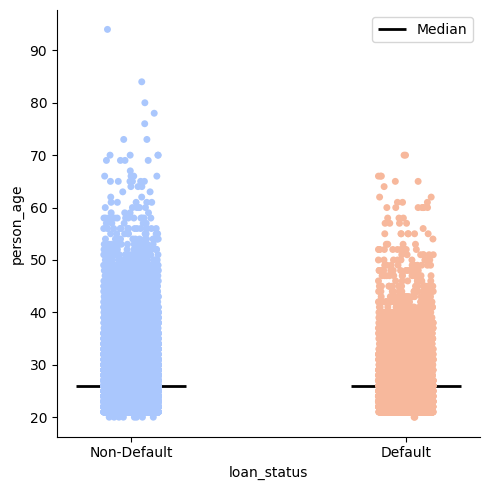

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


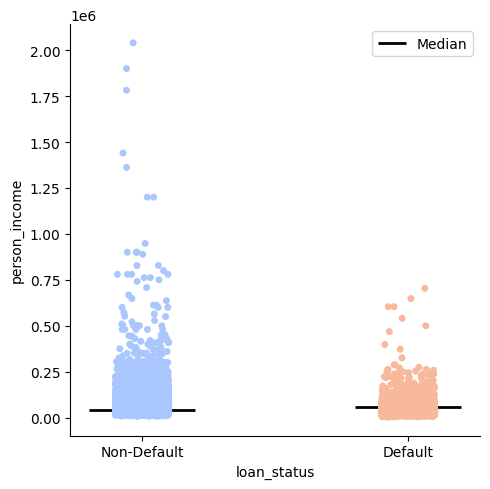

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


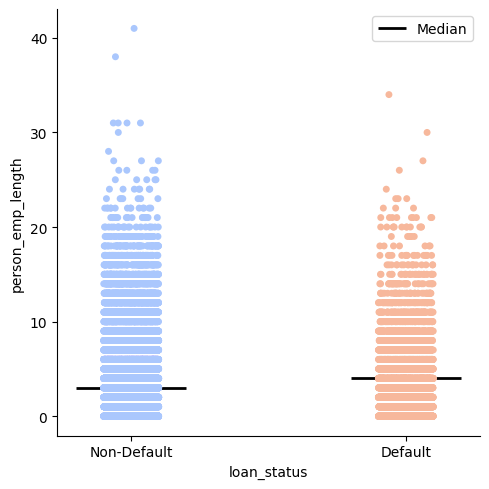

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


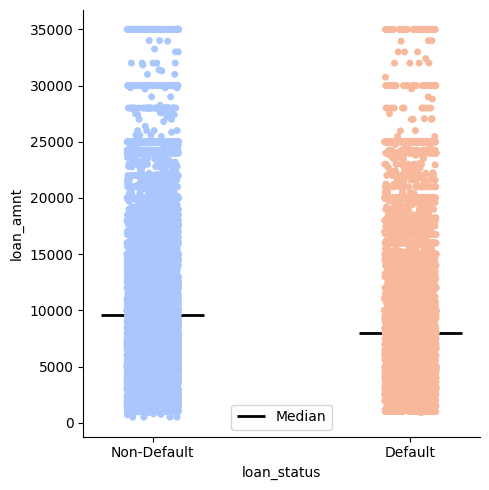

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


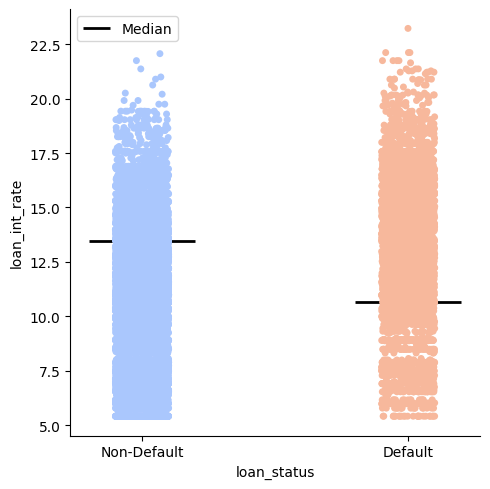

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


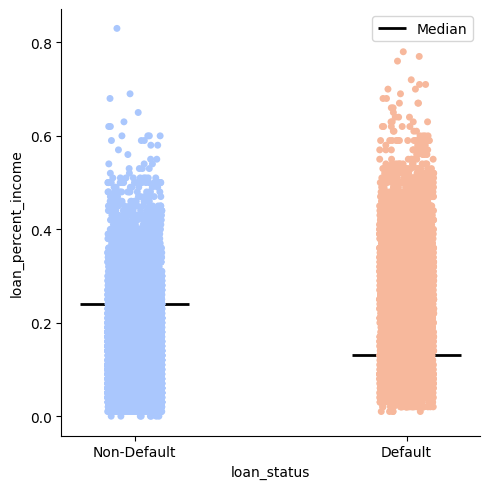

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1618934958.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")


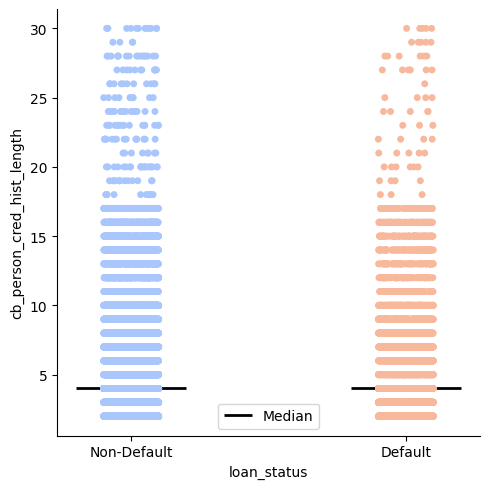

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1618934958.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


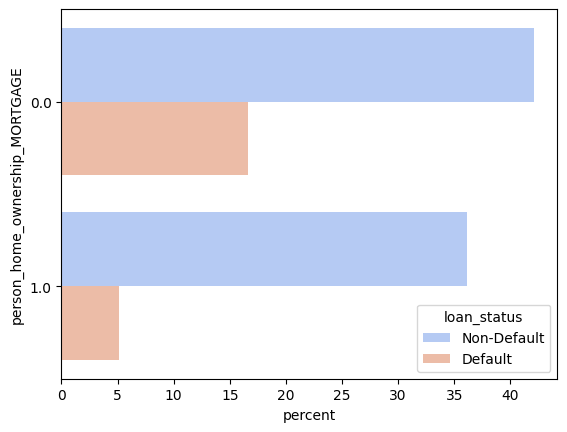

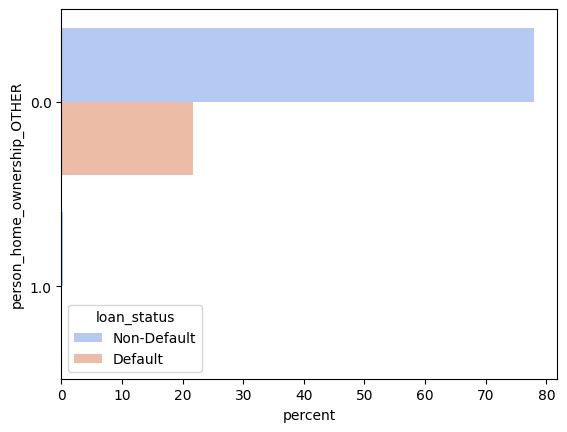

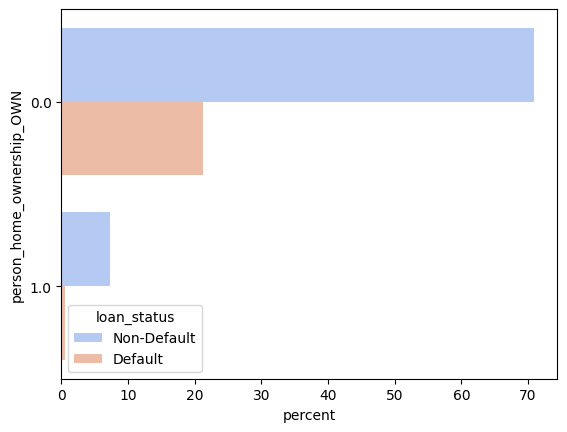

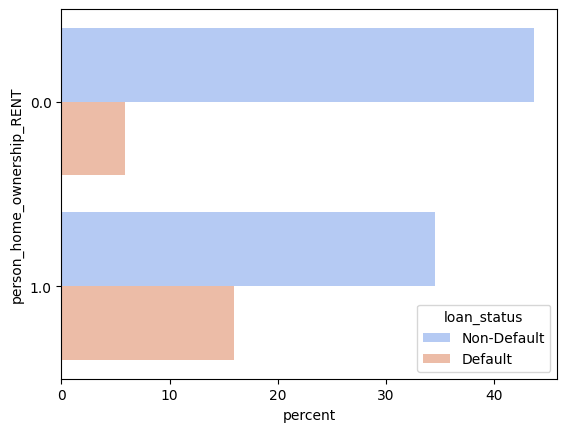

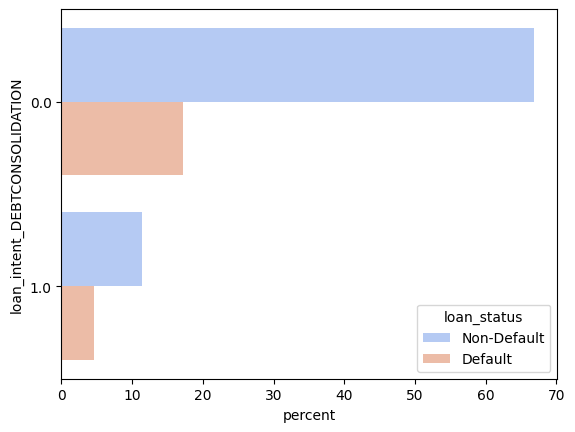

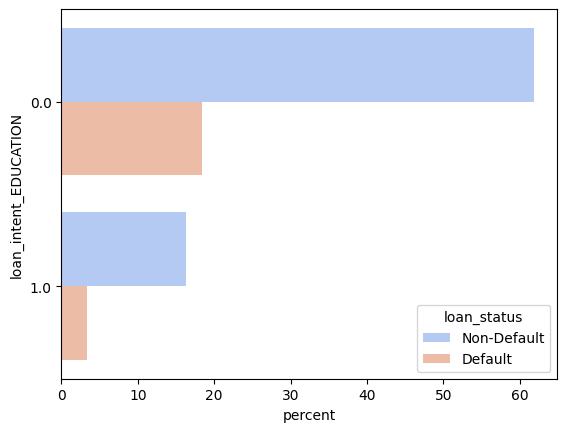

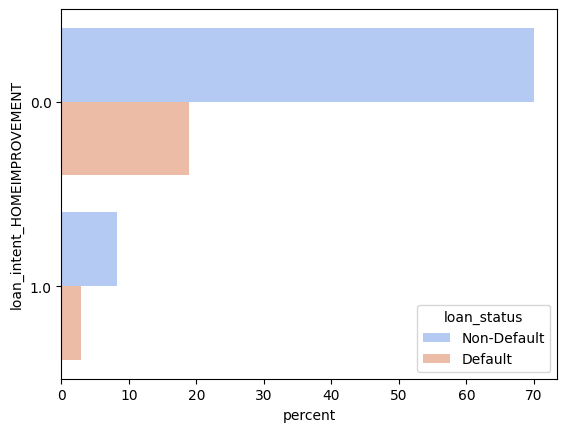

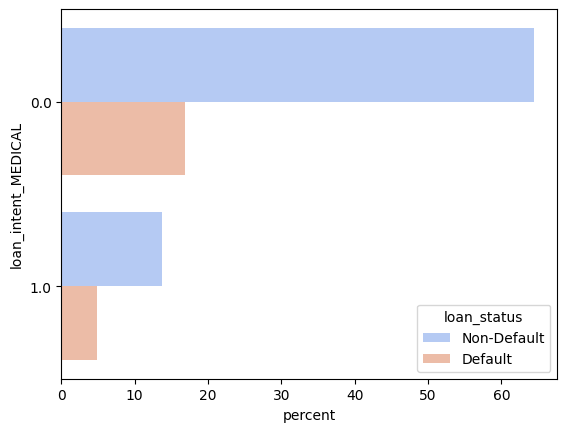

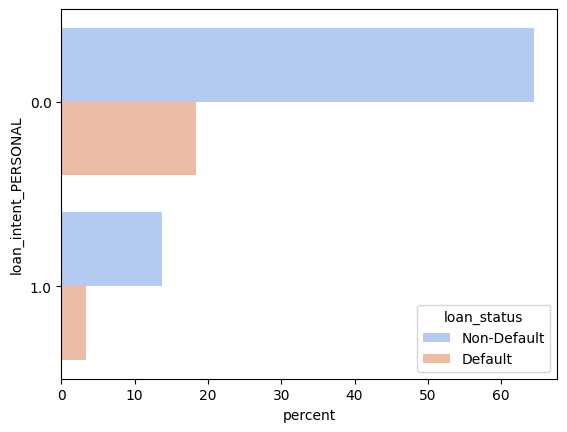

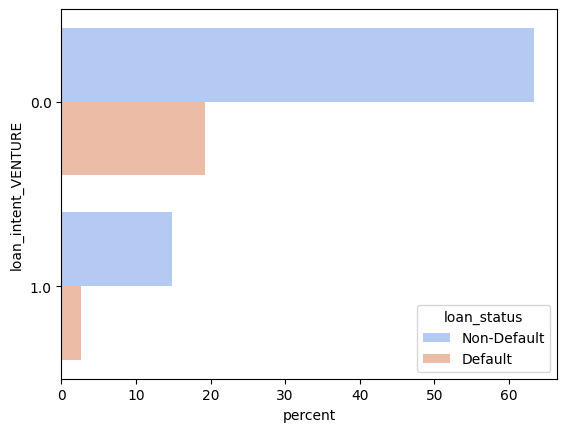

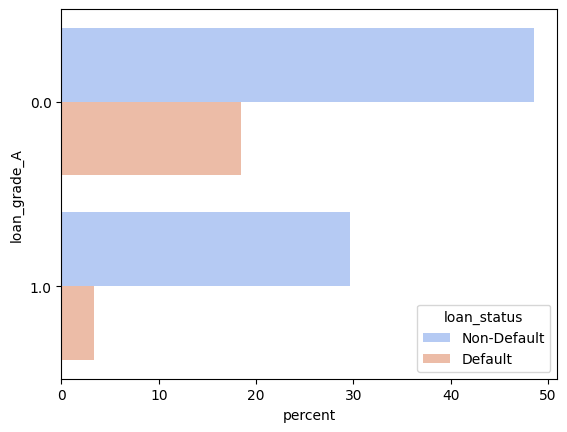

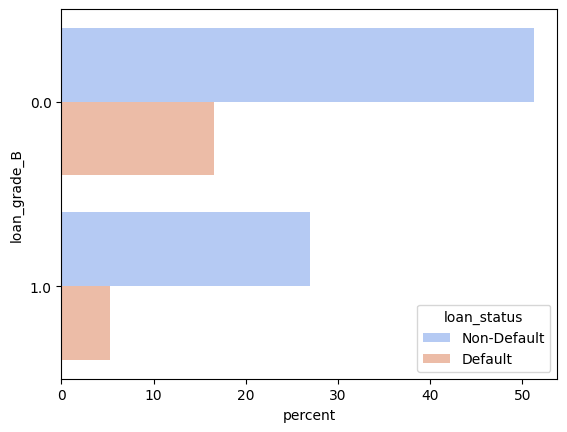

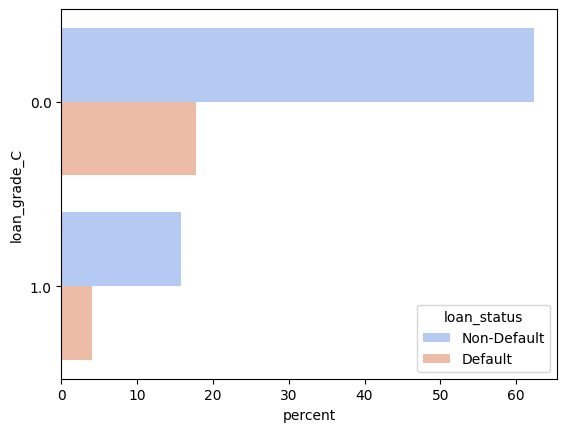

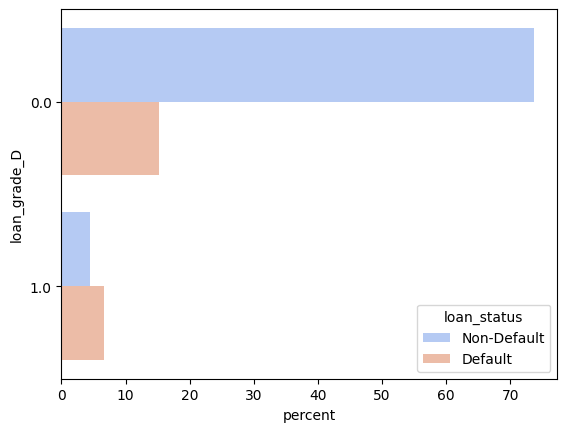

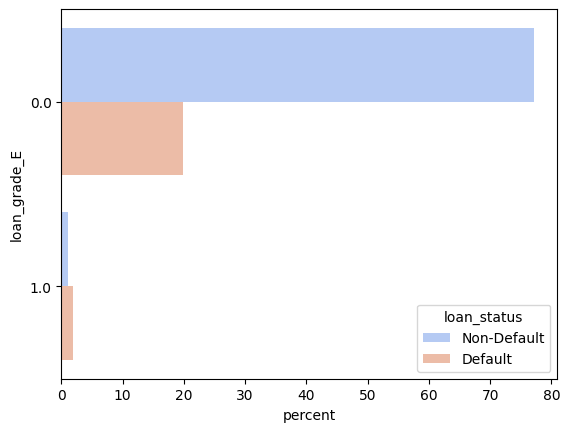

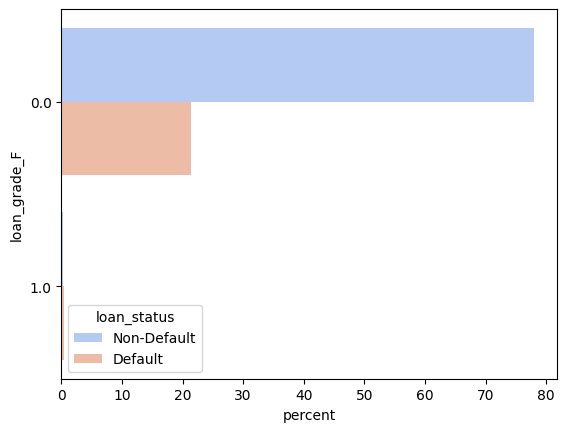

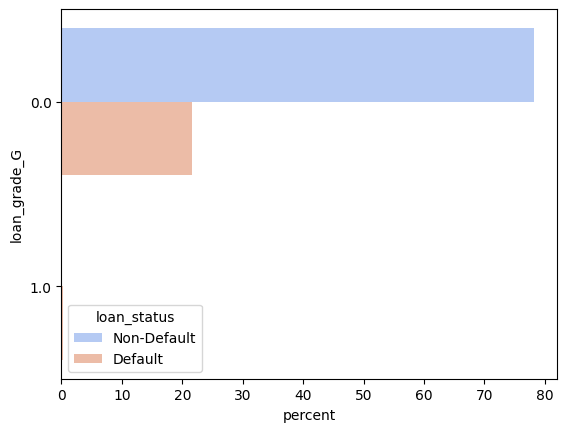

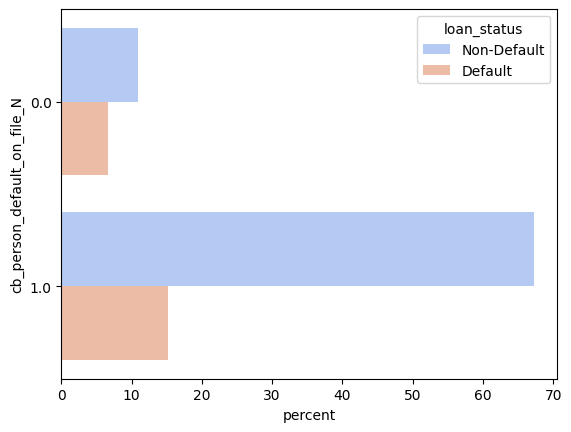

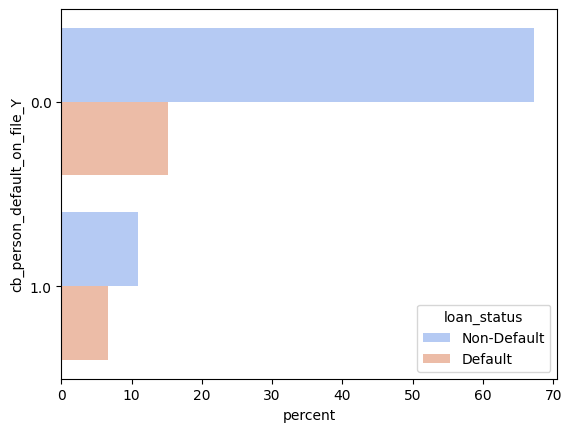

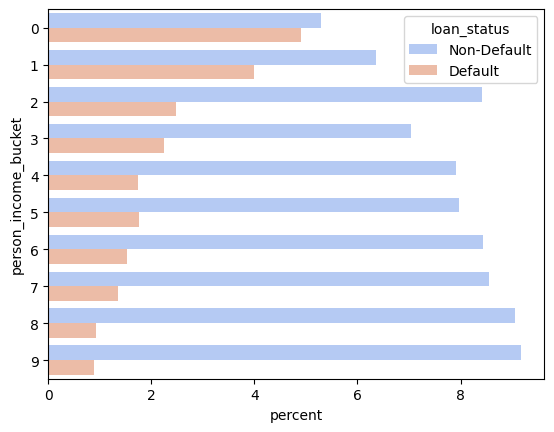

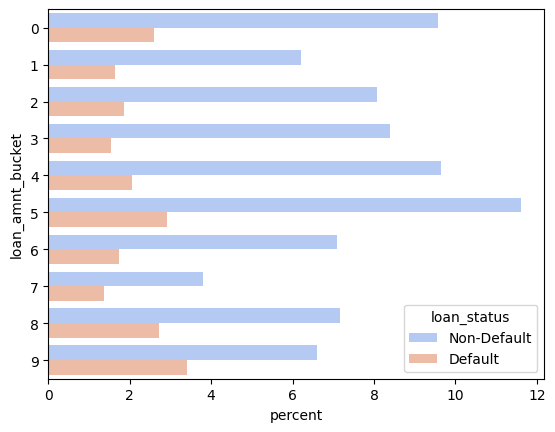

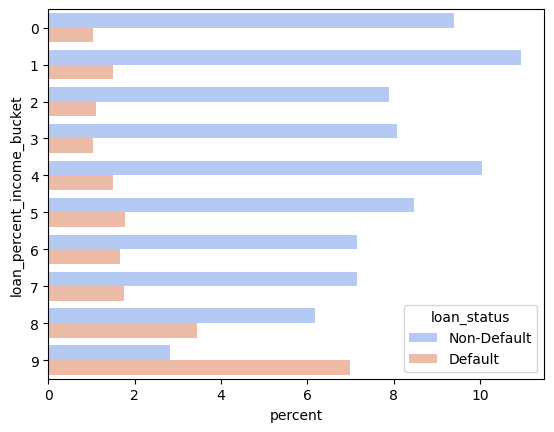

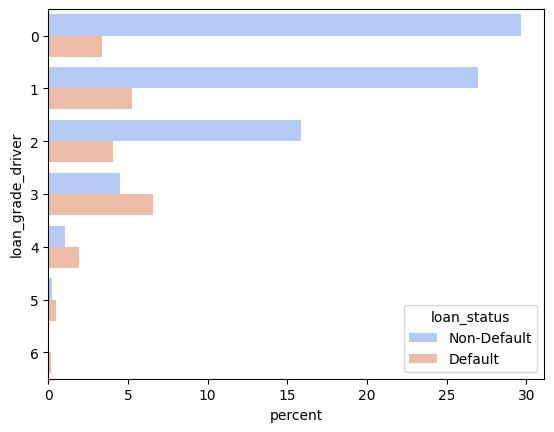

In [416]:
train_plot = train.copy()
train_plot["loan_status"] = train_plot["loan_status"].apply(lambda x: "Default" if x == 1 else "Non-Default")

# Plot the numerical columns
for col in riskdriver_num_columns:
    # Create the catplot
    g = sns.catplot(data=train_plot, y=col, x="loan_status", palette="coolwarm", kind="strip")

    # Get the median values for each category
    medians = train_plot.groupby("loan_status")[col].median()

    # Add horizontal median markers
    ax = g.ax
    for i, category in enumerate(medians.index):
        ax.hlines(y=medians[category], xmin=i - 0.2, xmax=i + 0.2, color="black", linewidth=2, label="Median" if i == 0 else "")

    plt.legend()
    plt.show()

    # Plot the numerical columns
for col in riskdriver_cat_columns:

    fig, ax = plt.subplots()
    # Create the catplot
    sns.countplot(data=train_plot, y=col, hue="loan_status", palette="coolwarm", ax = ax, stat="percent")


/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/394415246.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/394415246.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.sort_values(c).groupby(c)["loan_status"].mean().plot(kind = "bar", ax = ax)
/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/394415246.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a fu

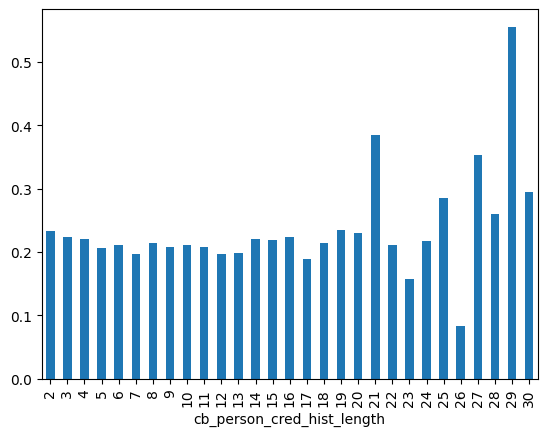

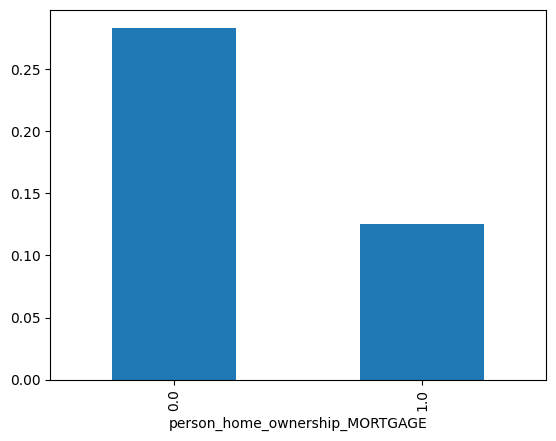

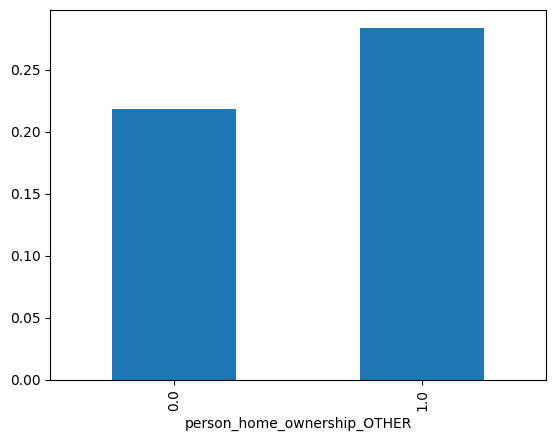

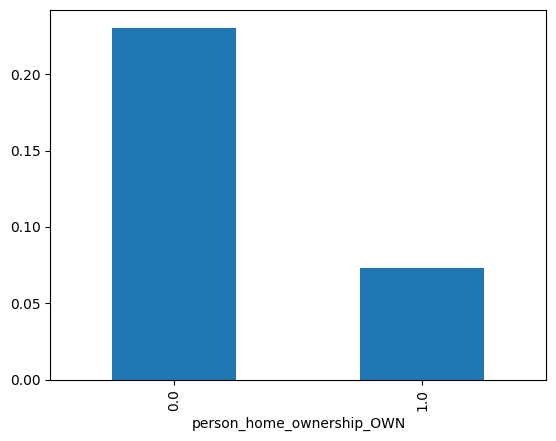

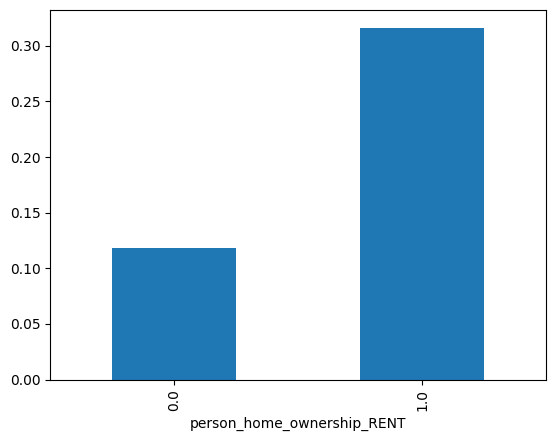

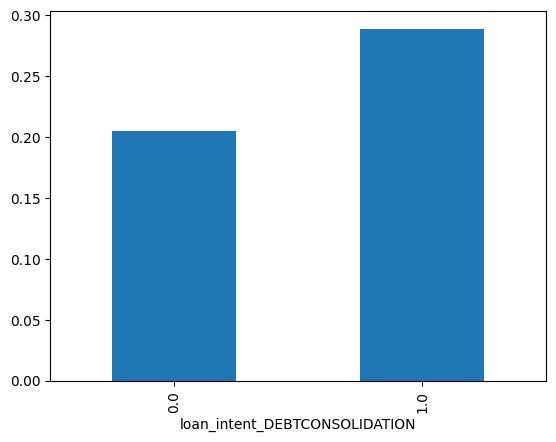

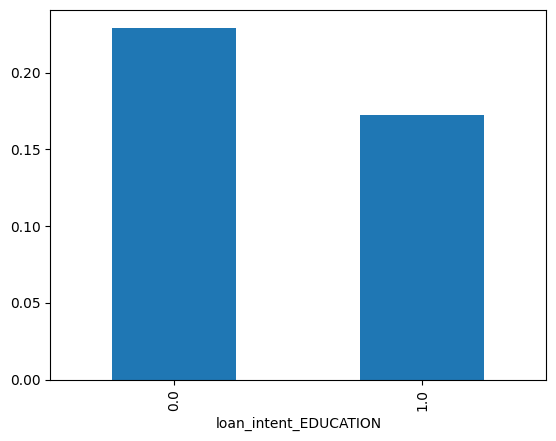

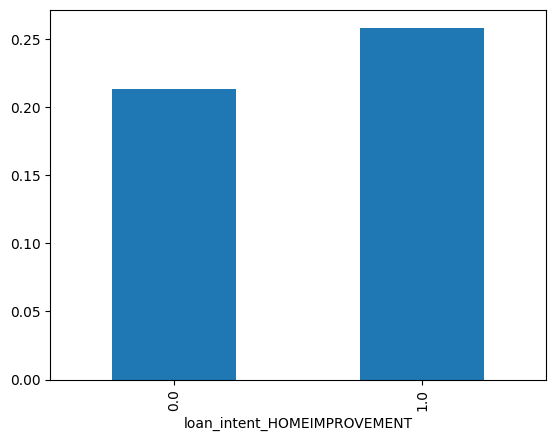

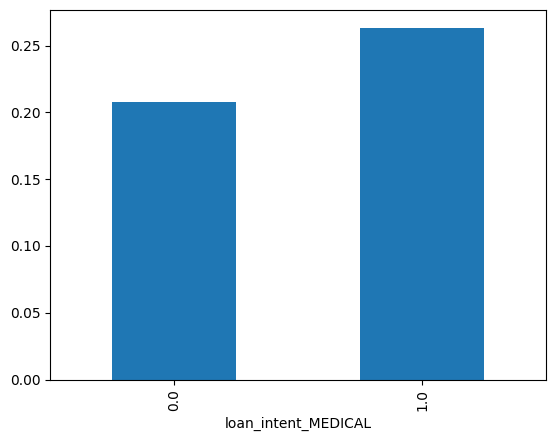

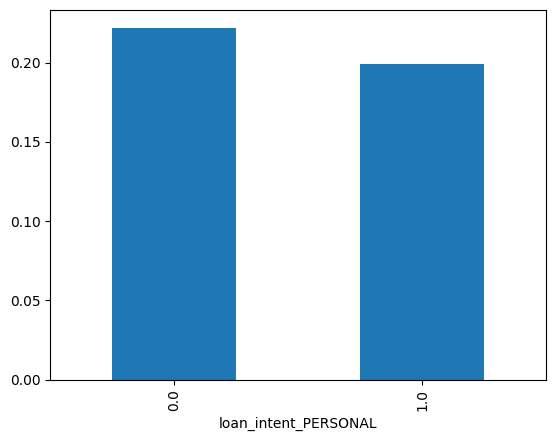

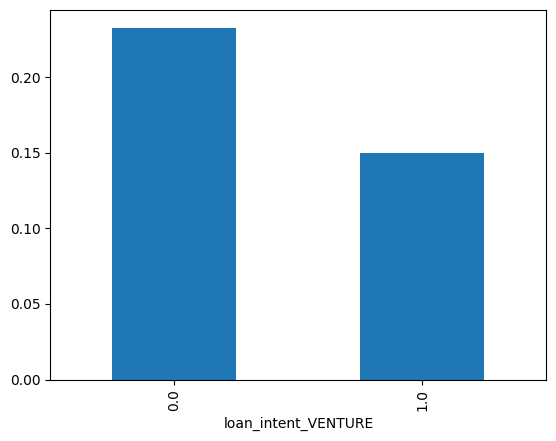

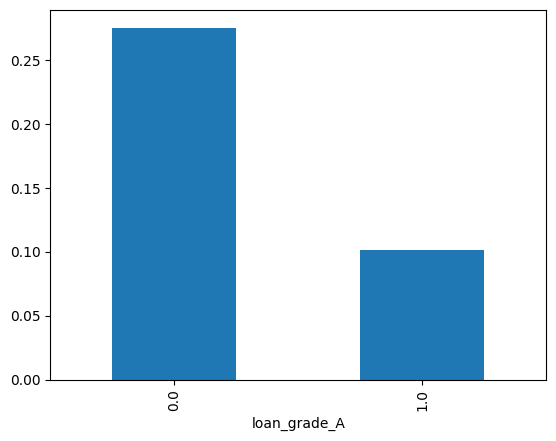

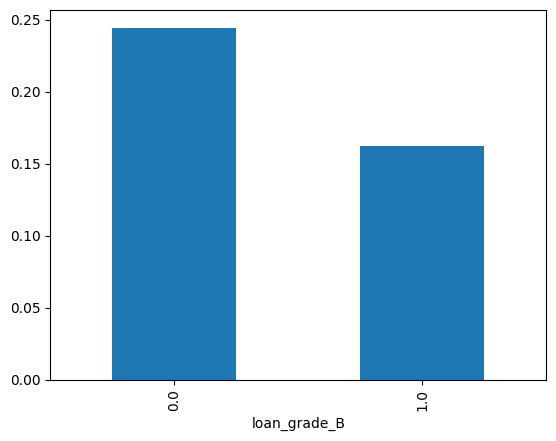

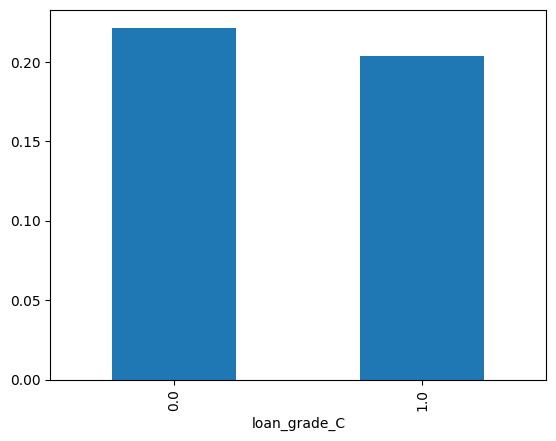

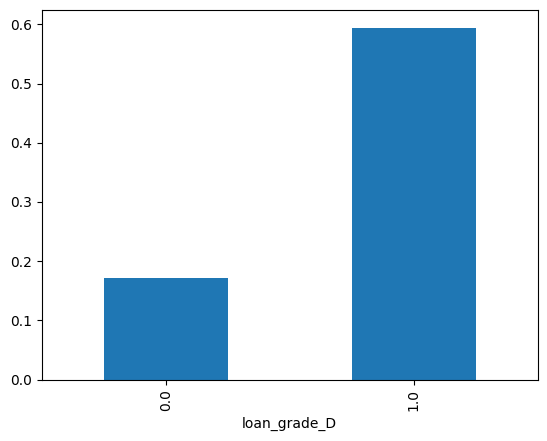

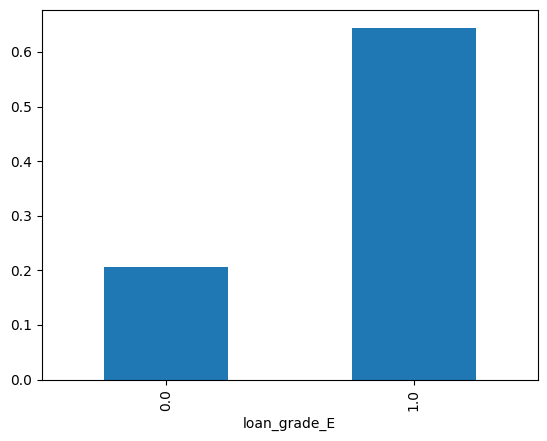

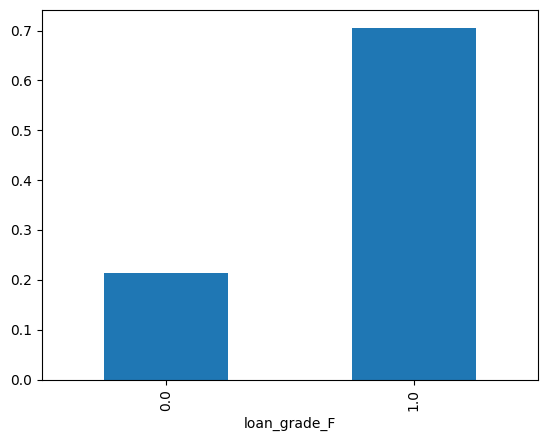

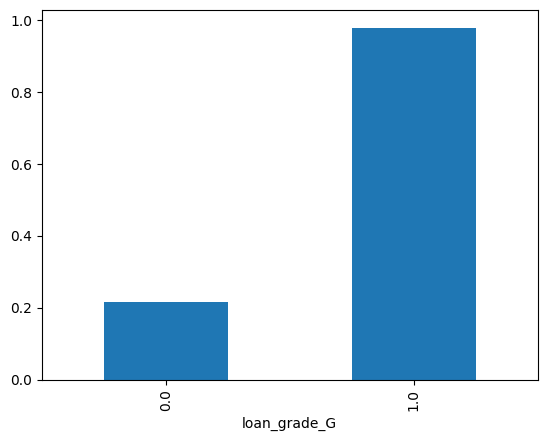

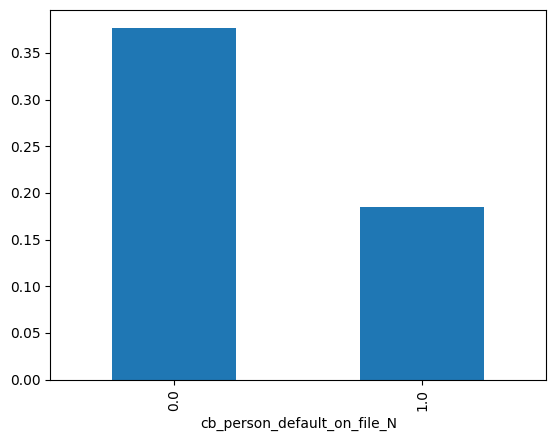

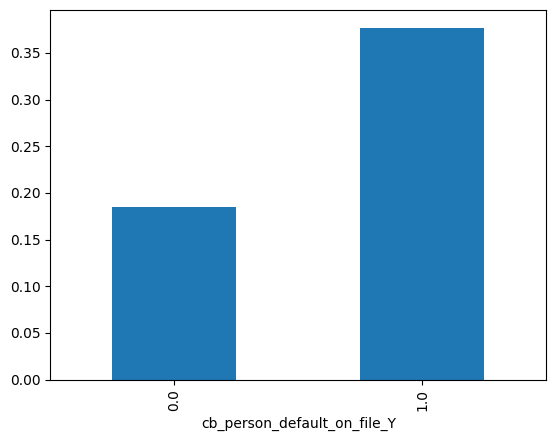

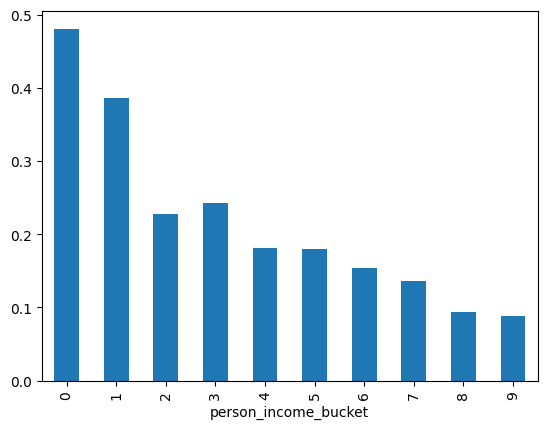

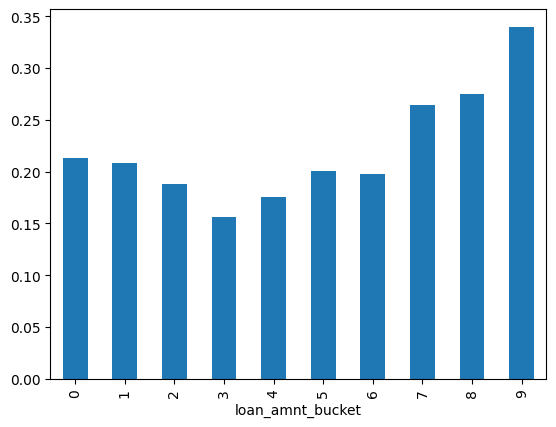

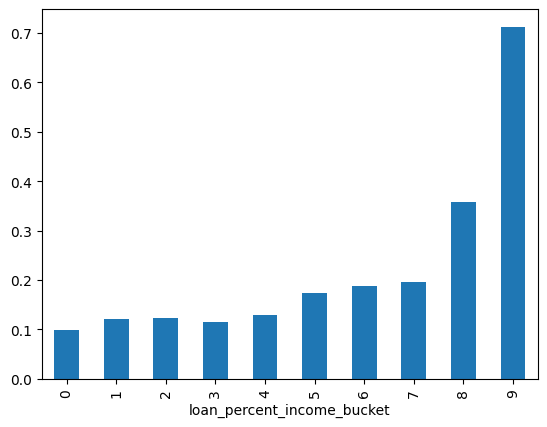

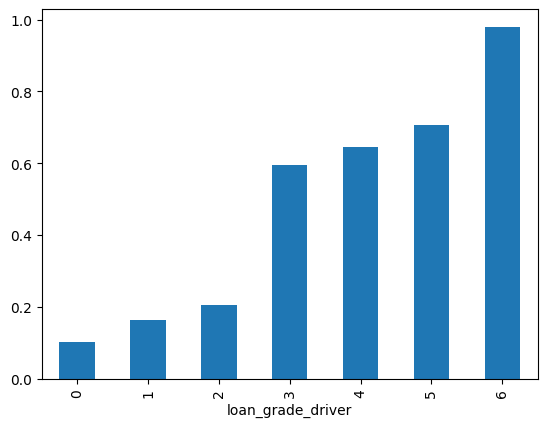

In [417]:
##Lets look at the average target variable per category per risk driver using bucketed numerical columns and categorical columns
columns_to_consider = [
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y',
       'person_income_bucket', 'loan_amnt_bucket',
       'loan_percent_income_bucket', 'loan_grade_driver'
]

dict_results = {}
tmp = pd.DataFrame()

for c in columns_to_consider:
    fig, ax = plt.subplots()
    train.sort_values(c).groupby(c)["loan_status"].mean().plot(kind = "bar", ax = ax)




#### Correlation between variable and target

In [418]:
corr_dict = {}
for col in riskdriver_cat_columns + riskdriver_num_columns:
    corr_dict[col] = np.round(train[col].corr(train["loan_status"]), 3)

sorted_dict_asc = dict(sorted(corr_dict.items(), key=lambda item: item[1]))
print(sorted_dict_asc)

{'person_income_bucket': np.float64(-0.267), 'loan_grade_A': np.float64(-0.198), 'person_home_ownership_MORTGAGE': np.float64(-0.189), 'cb_person_default_on_file_N': np.float64(-0.177), 'person_income': np.float64(-0.168), 'person_home_ownership_OWN': np.float64(-0.103), 'loan_grade_B': np.float64(-0.093), 'person_emp_length': np.float64(-0.087), 'loan_intent_VENTURE': np.float64(-0.076), 'loan_intent_EDUCATION': np.float64(-0.055), 'loan_intent_PERSONAL': np.float64(-0.021), 'person_age': np.float64(-0.02), 'loan_grade_C': np.float64(-0.017), 'cb_person_cred_hist_length': np.float64(-0.012), 'person_home_ownership_OTHER': np.float64(0.009), 'loan_intent_HOMEIMPROVEMENT': np.float64(0.034), 'loan_intent_MEDICAL': np.float64(0.052), 'loan_intent_DEBTCONSOLIDATION': np.float64(0.075), 'loan_grade_G': np.float64(0.081), 'loan_amnt_bucket': np.float64(0.086), 'loan_grade_F': np.float64(0.1), 'loan_amnt': np.float64(0.105), 'cb_person_default_on_file_Y': np.float64(0.177), 'loan_grade_E': n

#### Gini coefficient between variable and target

#### Logistic Regression: Mathematics & Explanation

1. What is Logistic Regression?

Logistic regression is a statistical model used for binary classification (i.e., when the target variable is 0 or 1). Instead of predicting a continuous value like in linear regression, it predicts a probability that an observation belongs to class 1.

2. Mathematical Formulation

Logistic regression models the probability that a given input $x$ belongs to class 1 using the sigmoid function:

$$
P(Y = 1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n)}}
$$

Where:
- $P(Y = 1 | X)$ is the predicted probability of the target being 1.
- $\beta_0$ is the intercept (bias term).
- $\beta_1, \beta_2, \dots, \beta_n$ are the coefficients (weights) for the predictors $X_1, X_2, \dots, X_n$.
- $e$ is the mathematical constant (Euler’s number, ~2.718).

3. Why Use the Sigmoid Function?

The sigmoid function:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

maps any real number $z$ to a value between 0 and 1, making it suitable for probability predictions.

---

Deriving Logistic Regression Coefficients

To estimate $\beta_0, \beta_1, \dots, \beta_n$, we use **Maximum Likelihood Estimation (MLE)**.

For a dataset with $m$ observations, define:

$$
L(\beta) = \prod_{i=1}^{m} P(y_i | X_i) = \prod_{i=1}^{m} \left( \frac{1}{1 + e^{-X_i^T \beta}} \right)^{y_i} \left( 1 - \frac{1}{1 + e^{-X_i^T \beta}} \right)^{(1 - y_i)}
$$

Taking the log-likelihood function:

$$
\log L(\beta) = \sum_{i=1}^{m} \left[ y_i \log P(y_i | X_i) + (1 - y_i) \log(1 - P(y_i | X_i)) \right]
$$

To find the best coefficients $\beta$, we maximize $\log L(\beta)$ using optimization techniques like gradient descent or Newton’s method.

---

Gini Coefficient & ROC AUC

The **Gini coefficient** measures how well the logistic regression model separates the two classes (0 and 1).

1. ROC Curve & AUC
- The **Receiver Operating Characteristic (ROC)** curve plots **True Positive Rate (TPR)** vs. **False Positive Rate (FPR)** at different probability thresholds.
- The **Area Under the Curve (AUC)** quantifies the ability of the model to distinguish between classes.

2. Gini Coefficient Formula

The **Gini coefficient** is derived from **AUC**:

$$
G = 2 \times \text{AUC} - 1
$$

- If $G = 1$, the model perfectly distinguishes between 0 and 1.
- If $G = 0$, the model is no better than random guessing.
- If $G < 0$, the model performs worse than random guessing.

---

Simple Explanation in Words
1. Logistic Regression transforms a linear combination of inputs into a probability using the sigmoid function.
2. It estimates the best-fitting coefficients using maximum likelihood estimation.
3. The Gini Coefficient measures how well the model differentiates between classes, derived from the AUC of the ROC curve.

In [419]:
def compute_gini_per_risk_driver(df, risk_drivers, target):
    """
    Compute the Gini coefficient for each risk driver in relation to a binary target variable 
    using logistic regression.

    Parameters:
    ----------
    df : pd.DataFrame
        The input DataFrame containing risk drivers and the target variable.
    risk_drivers : list
        List of column names representing risk drivers.
    target : str
        The target variable column name (binary).

    Returns:
    -------
    pd.DataFrame
        A DataFrame showing the Gini coefficient per risk driver, sorted from highest to lowest.
    """
    results = []

    for driver in risk_drivers:
        # Remove NaNs for valid model training
        temp_df = df[[driver, target]].dropna()

        X = temp_df[[driver]]  # Predictor (single risk driver)
        y = temp_df[target]  # Binary target variable

        model = LogisticRegression(solver='liblinear')
        model.fit(X, y)

        # Predict probabilities
        y_pred_prob = model.predict_proba(X)[:, 1]

        # Compute ROC AUC and Gini coefficient
        auc = roc_auc_score(y, y_pred_prob)
        gini = 2 * auc - 1

        results.append({'Risk Driver': driver, 'Gini Coefficient': gini})

    # Convert results to a DataFrame and sort from highest Gini to lowest
    gini_df = pd.DataFrame(results).sort_values(by="Gini Coefficient", ascending=False)

    return gini_df

bivariate_gini = compute_gini_per_risk_driver(train, riskdriver_cat_columns + riskdriver_num_columns, target_column[0])
bivariate_gini

,Risk Driver,Gini Coefficient
28,loan_percent_income,0.456699
21,loan_percent_income_bucket,0.451888
22,loan_grade_driver,0.441853
27,loan_int_rate,0.438387
24,person_income,0.384408
19,person_income_bucket,0.373159
3,person_home_ownership_RENT,0.290385
13,loan_grade_D,0.244133
10,loan_grade_A,0.225386
0,person_home_ownership_MORTGAGE,0.224680


#### Remove risk drivers with Gini < 0.05 threshold as they have little predictive power

In [420]:
bivariate_gini[bivariate_gini["Gini Coefficient"]>=0.05]

riskdriver_cat_columns = [c for c in riskdriver_cat_columns if c in bivariate_gini[bivariate_gini["Gini Coefficient"]>=0.05]["Risk Driver"].to_list()]
riskdriver_num_columns = [c for c in riskdriver_num_columns if c in bivariate_gini[bivariate_gini["Gini Coefficient"]>=0.05]["Risk Driver"].to_list()]

### Correlation

<Axes: >

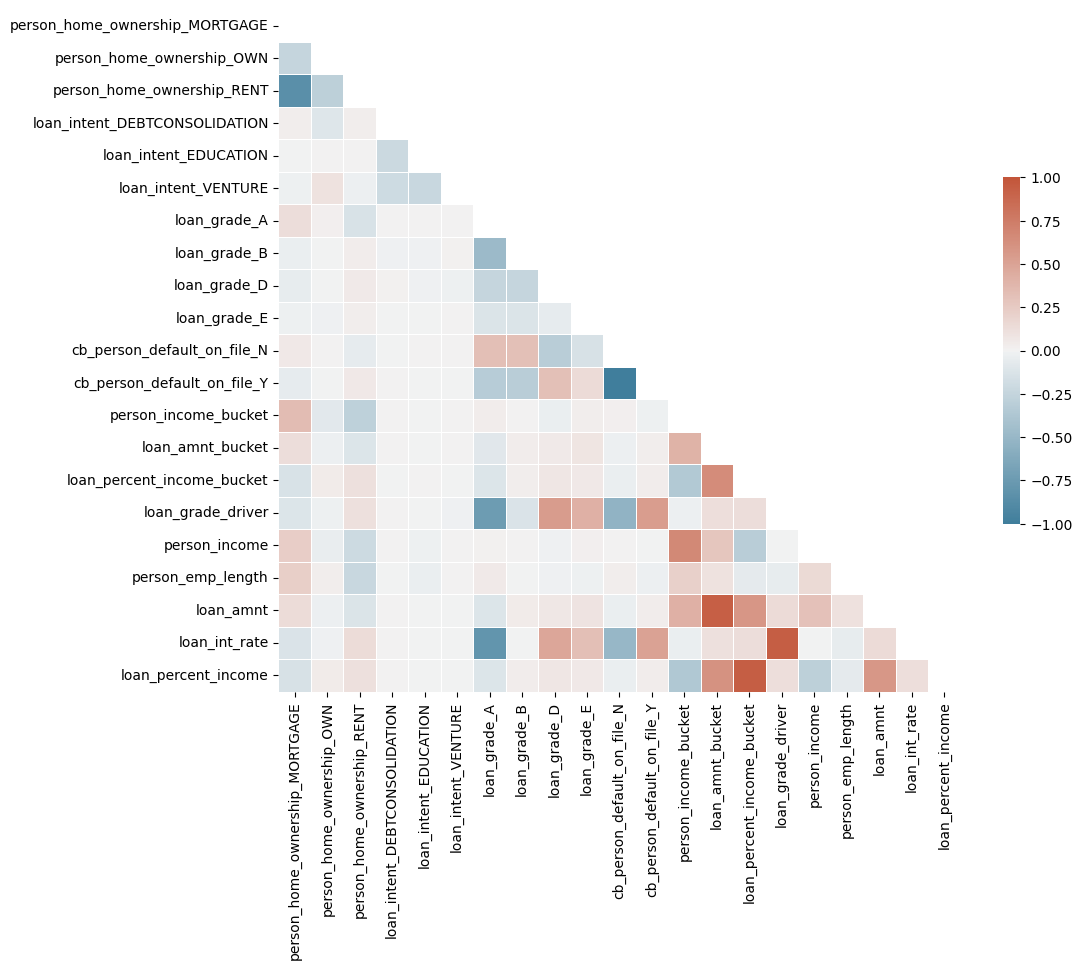

In [421]:
#Now we have removed some risk drivers based on relationship with target variable, lets look at correlation. 
#We want to remove highly correlated variables as they may not add value to the model

# Compute the correlation matrix
corr = train[riskdriver_cat_columns+riskdriver_num_columns].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [422]:
##We see some correlation between variables.
#We want to remove correlated pairs with correlation > 0.5, whilst keeping the one with the highest Gini coefficient. 
#We need gini coefficient, correlation matrix and the columns to remove

def remove_correlated_features(df, corr_matrix, gini_df, threshold=0.5):
    """
    Remove correlated features based on a correlation matrix and a threshold value. 
    If two features are correlated above the threshold, the one with the lower Gini coefficient is removed.
    """

    # Create a copy of the correlation matrix
    corr_matrix_copy = corr_matrix.copy()

    # Get the list of features to remove
    features_to_remove = []

    print("\n### Identifying Correlated Features ###\n")

    # Iterate through the columns of the correlation matrix
    for i, col in enumerate(corr_matrix.columns):
        for j in range(i+1, len(corr_matrix.columns)):
            # Check if the correlation is above the threshold
            correlation = corr_matrix.iloc[i, j]
            if abs(correlation) > threshold:
                # Get the feature names
                feature_i = corr_matrix.columns[i]
                feature_j = corr_matrix.columns[j]

                # Get the Gini coefficients for the features
                gini_i = gini_df[gini_df["Risk Driver"] == feature_i]["Gini Coefficient"].values[0]
                gini_j = gini_df[gini_df["Risk Driver"] == feature_j]["Gini Coefficient"].values[0]

                # Determine which feature to remove based on the Gini coefficient
                if gini_i > gini_j:
                    features_to_remove.append(feature_j)
                    removed = feature_j
                else:
                    features_to_remove.append(feature_i)
                    removed = feature_i

                # Print details
                print(f"Considering: {feature_i} & {feature_j} | Correlation: {correlation:.4f}")
                print(f"Gini {feature_i}: {gini_i:.4f}, Gini {feature_j}: {gini_j:.4f}")
                print(f"Removing: {removed}\n")

    return list(set(features_to_remove))

remove_list = remove_correlated_features(train, train[riskdriver_cat_columns+riskdriver_num_columns].corr(), bivariate_gini, threshold=0.5)


riskdriver_cat_columns = [c for c in riskdriver_cat_columns if c not in remove_list]
riskdriver_num_columns = [c for c in riskdriver_num_columns if c not in remove_list]

#We now have a set of uncorrelated risk drivers to further consider for model selection. 
#NOTE, the above method is not completely optimal. An optimal approach would be to recompute the correlation matrix after each removal, 
#as drivers can be correlated with multiple variables and in the end, effect which ones we consider further. 


### Identifying Correlated Features ###

Considering: person_home_ownership_MORTGAGE & person_home_ownership_RENT | Correlation: -0.8467
Gini person_home_ownership_MORTGAGE: 0.2247, Gini person_home_ownership_RENT: 0.2904
Removing: person_home_ownership_MORTGAGE

Considering: loan_grade_A & loan_grade_driver | Correlation: -0.7344
Gini loan_grade_A: 0.2254, Gini loan_grade_driver: 0.4419
Removing: loan_grade_A

Considering: loan_grade_A & loan_int_rate | Correlation: -0.8039
Gini loan_grade_A: 0.2254, Gini loan_int_rate: 0.4384
Removing: loan_grade_A

Considering: loan_grade_D & loan_grade_driver | Correlation: 0.5409
Gini loan_grade_D: 0.2441, Gini loan_grade_driver: 0.4419
Removing: loan_grade_D

Considering: cb_person_default_on_file_N & cb_person_default_on_file_Y | Correlation: -1.0000
Gini cb_person_default_on_file_N: 0.1635, Gini cb_person_default_on_file_Y: 0.1635
Removing: cb_person_default_on_file_N

Considering: cb_person_default_on_file_N & loan_grade_driver | Correlation:

####Multi-colinearity using VIF

In [465]:
def calculate_vif(df, features):
    """
    Calculate Variance Inflation Factor (VIF) for a given set of features.
    
    Parameters:
    df (pd.DataFrame): The dataset containing the features.
    features (list): List of column names to check for multicollinearity.
    
    Returns:
    pd.DataFrame: A DataFrame showing each feature and its corresponding VIF value.
    """
    # Ensure only numeric columns are included
    df = df[features].copy()

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif_data

# Apply the function to your dataset
remaining_features = riskdriver_cat_columns + riskdriver_num_columns
vif_results = calculate_vif(train, remaining_features)

# Display the results
print(vif_results.sort_values(by="VIF", ascending=False))

                          Feature       VIF
10            loan_percent_income  2.937868
7               loan_grade_driver  2.485374
9               person_emp_length  2.197764
8                   person_income  2.141704
1      person_home_ownership_RENT  2.065971
5                    loan_grade_B  1.465782
3           loan_intent_EDUCATION  1.334650
4             loan_intent_VENTURE  1.317557
2   loan_intent_DEBTCONSOLIDATION  1.286309
6                    loan_grade_E  1.249403
0       person_home_ownership_OWN  1.181215


### Multivariate selection

In [423]:
##I am going to use forward selection to select the best model. The forward selection will be based on the Gini added to the final model.
##An alternative could be to use the p-value or stepwise selection.

def gini_from_auc(auc):
    """Convert AUC to Gini coefficient."""
    return 2 * auc - 1

def calculate_gini(df, num_features, cat_features, target):
    """
    Computes the Gini coefficient for a logistic regression model.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - num_features: List of numerical feature names.
    - cat_features: List of categorical feature names (already in dummy form).
    - target: Name of the target column.
    
    Returns:
    - Gini coefficient of the trained model.
    """
    # Combine features
    features = num_features + cat_features

    # Copy DataFrame to avoid modifying the original
    df_scaled = df.copy()

    # Apply StandardScaler only if numerical features exist
    if num_features:
        scaler = StandardScaler()
        df_scaled[num_features] = scaler.fit_transform(df[num_features])

    # Train logistic regression model
    model = LogisticRegression(solver='liblinear')
    model.fit(df_scaled[features], df[target])
    
    # Predict probabilities
    preds = model.predict_proba(df_scaled[features])[:, 1]
    
    # Compute AUC
    auc = roc_auc_score(df[target], preds)
    
    # Convert AUC to Gini coefficient
    return gini_from_auc(auc)

def forward_selection_gini(df, num_features, cat_features, target, threshold=0.01):
    """
    Performs forward selection to find the best risk drivers based on Gini improvement.
    
    Parameters:
    - df: DataFrame containing the dataset.
    - num_features: List of numerical feature names.
    - cat_features: List of categorical feature names.
    - target: Name of the target column.
    - threshold: Minimum Gini increase required to add a feature.
    
    Returns:
    - List of selected features.
    """
    risk_drivers = num_features + cat_features
    selected_drivers = []
    remaining_drivers = risk_drivers.copy()
    step = 1
    
    # Step 1: Find the single best risk driver (highest Gini)
    best_gini = -1
    best_driver = None
    gini_results = {}

    for driver in remaining_drivers:
        gini = calculate_gini(df, [driver] if driver in num_features else [], [driver] if driver in cat_features else [], target)
        gini_results[driver] = gini
        if gini > best_gini:
            best_gini = gini
            best_driver = driver
    
    if best_driver is None:
        print("No valid risk driver found.")
        return []
    
    selected_drivers.append(best_driver)
    remaining_drivers.remove(best_driver)
    print(f"Step {step}: Adding '{best_driver}' with Gini = {best_gini:.4f}")
    
    # Step 2: Iteratively add risk drivers
    current_gini = best_gini
    while remaining_drivers:
        best_additional_gini = 0
        best_new_driver = None
        
        for driver in remaining_drivers:
            new_gini = calculate_gini(df, 
                                      [f for f in selected_drivers + [driver] if f in num_features], 
                                      [f for f in selected_drivers + [driver] if f in cat_features], 
                                      target)
            additional_gini = new_gini - current_gini
            
            print(f"\tTesting '{driver}' -> Additional Gini: {additional_gini:.4f}")
            
            if additional_gini > best_additional_gini:
                best_additional_gini = additional_gini
                best_new_driver = driver
        
        # Stop if no driver improves Gini above threshold
        if best_additional_gini < threshold:
            print(f"Stopping: No remaining driver adds more than {threshold:.4f} Gini.")
            break
        
        # Add the best new driver
        selected_drivers.append(best_new_driver)
        remaining_drivers.remove(best_new_driver)
        current_gini += best_additional_gini
        step += 1
        print(f"Step {step}: Adding '{best_new_driver}' -> Total Gini = {current_gini:.4f}")
    
    return selected_drivers

# Example usage
selected_riskdrivers = forward_selection_gini(train, riskdriver_num_columns, riskdriver_cat_columns, target_column[0], threshold=0.01)
selected_riskdrivers

Step 1: Adding 'loan_percent_income' with Gini = 0.4567
	Testing 'person_income' -> Additional Gini: 0.0468
	Testing 'person_emp_length' -> Additional Gini: 0.0124
	Testing 'person_home_ownership_OWN' -> Additional Gini: 0.0278
	Testing 'person_home_ownership_RENT' -> Additional Gini: 0.0627
	Testing 'loan_intent_DEBTCONSOLIDATION' -> Additional Gini: 0.0149
	Testing 'loan_intent_EDUCATION' -> Additional Gini: 0.0089
	Testing 'loan_intent_VENTURE' -> Additional Gini: 0.0189
	Testing 'loan_grade_B' -> Additional Gini: 0.0351
	Testing 'loan_grade_E' -> Additional Gini: 0.0393
	Testing 'loan_grade_driver' -> Additional Gini: 0.2022
Step 2: Adding 'loan_grade_driver' -> Total Gini = 0.6589
	Testing 'person_income' -> Additional Gini: 0.0270
	Testing 'person_emp_length' -> Additional Gini: 0.0025
	Testing 'person_home_ownership_OWN' -> Additional Gini: 0.0173
	Testing 'person_home_ownership_RENT' -> Additional Gini: 0.0287
	Testing 'loan_intent_DEBTCONSOLIDATION' -> Additional Gini: 0.0031


['loan_percent_income',
 'loan_grade_driver',
 'person_home_ownership_RENT',
 'person_income']

### View model and do some analysis

In [424]:
selected_cat_columns = [c for c in selected_riskdrivers if c in riskdriver_cat_columns]
selected_num_columns = [c for c in selected_riskdrivers if c in riskdriver_num_columns]

#We want to train the model on the train data and apply it to the test set to see performance on unseen data

#First use StandardScaler to scale the numerical variables
# Apply StandardScaler to the selected features
scaled_train_df = train.copy()
scaled_test_df = test.copy()

scaler = StandardScaler()
scaled_train_df[selected_num_columns] = scaler.fit_transform(scaled_train_df[selected_num_columns])
scaled_test_df[selected_num_columns] = scaler.transform(scaled_test_df[selected_num_columns])

model = LogisticRegression(solver='liblinear')

model.fit(scaled_train_df[selected_cat_columns + selected_num_columns], train[target_column[0]])

train_probs = model.predict_proba(scaled_train_df[selected_cat_columns + selected_num_columns])[:, 1]
test_probs = model.predict_proba(scaled_test_df[selected_cat_columns + selected_num_columns])[:, 1]

train_preds = model.predict(scaled_train_df[selected_cat_columns + selected_num_columns])
test_preds = model.predict(scaled_test_df[selected_cat_columns + selected_num_columns])

auc_train = roc_auc_score(train[target_column[0]], train_probs)
gini_train = gini_from_auc(auc_train)

auc_test = roc_auc_score(test[target_column[0]], test_probs)
gini_test = gini_from_auc(auc_test)

intercept = model.intercept_[0]
coefficients = model.coef_[0]

model_df = pd.DataFrame()

model_df["Intercept"] = [intercept]
for i, c in enumerate(selected_riskdrivers):
    model_df[c] = [coefficients[i]]
model_df["Train Gini"] = [gini_train]
model_df["Test Gini"] = [gini_test]

model_df

,Intercept,loan_percent_income,loan_grade_driver,person_home_ownership_RENT,person_income,Train Gini,Test Gini
0,-3.457014,0.832289,1.077106,0.870486,-0.569217,0.701617,0.676601


In [425]:
from sklearn.metrics import classification_report

print(classification_report(scaled_train_df[target_column[0]], train_preds))
print(classification_report(scaled_test_df[target_column[0]], test_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     20372
           1       0.74      0.48      0.59      5687

    accuracy                           0.85     26059
   macro avg       0.81      0.72      0.75     26059
weighted avg       0.84      0.85      0.84     26059

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5095
           1       0.73      0.48      0.58      1420

    accuracy                           0.85      6515
   macro avg       0.80      0.72      0.74      6515
weighted avg       0.84      0.85      0.84      6515



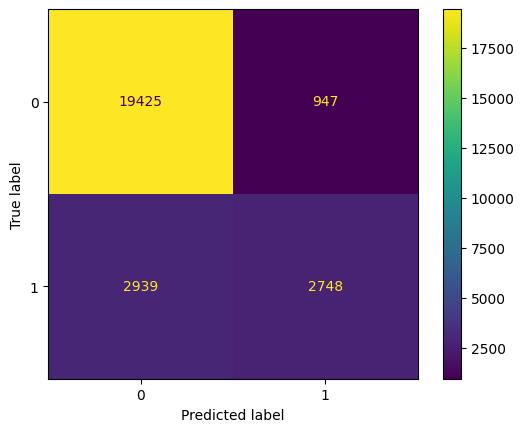

In [426]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(scaled_train_df[target_column[0]], train_preds, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [427]:
##Lets check out some of the misclassified cases

train_subset = scaled_train_df[selected_riskdrivers + target_column]
train_subset["Probability"] = train_probs
train_subset["Predicted"] = train_preds

test_subset = test[selected_riskdrivers + target_column]
test_subset["Probability"] = test_probs
test_subset["Predicted"] = test_preds

train_subset[train_subset["loan_status"] != train_subset["Predicted"]].head()

/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1363678339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_subset["Probability"] = train_probs
/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1363678339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_subset["Predicted"] = train_preds
/var/folders/y2/bny9wsr52gl03dnvz5w5ypz40000gn/T/ipykernel_27739/1363678339.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,loan_percent_income,loan_grade_driver,person_home_ownership_RENT,person_income,loan_status,Probability,Predicted
13487,-0.474453,0,0.0,0.259287,1,0.017678,0
1656,-0.381250,1,1.0,-0.999101,1,0.212355,0
15979,1.762422,0,1.0,-0.935553,1,0.422331,0
20930,2.880859,2,0.0,-0.398963,0,0.719586,1
10416,1.948828,0,1.0,-0.732776,1,0.433798,0


In [435]:
#Average target variable vs average predicted probability
print("Train set", train_subset[target_column[0]].mean(), train_subset["Probability"].mean(), train_subset["Predicted"].mean())
print("Test set", test_subset[target_column[0]].mean(), test_subset["Probability"].mean(), test_subset["Predicted"].mean())


Train set 0.21823554242296328 0.21836841086057596 0.14179362216508692
Test set 0.21795855717574827 0.21733752094549197 0.14336147352264006


### Challenger Models

#### Decision tree

Best Parameters from Grid Search: {'max_depth': 4, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 10}


/Users/shemkatz/Documents/code/credit_risk/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
135 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shemkatz/Documents/code/credit_risk/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shemkatz/Documents/code/credit_risk/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/shemkatz/Documents/code/credit_risk/.venv/lib/python3.9/site-packag

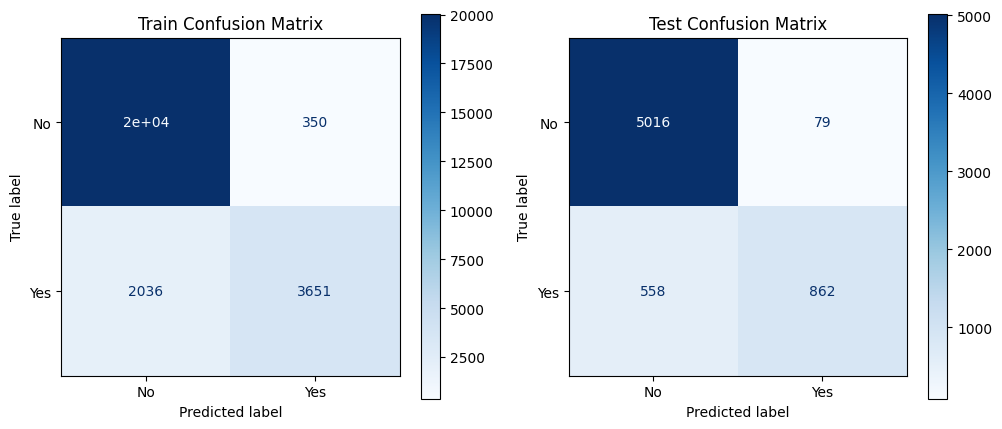

Train Set Performance:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     20372
           1       0.91      0.64      0.75      5687

    accuracy                           0.91     26059
   macro avg       0.91      0.81      0.85     26059
weighted avg       0.91      0.91      0.90     26059

Test Set Performance:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      5095
           1       0.92      0.61      0.73      1420

    accuracy                           0.90      6515
   macro avg       0.91      0.80      0.84      6515
weighted avg       0.90      0.90      0.89      6515

Train Gini: 0.7635
Test Gini: 0.7195


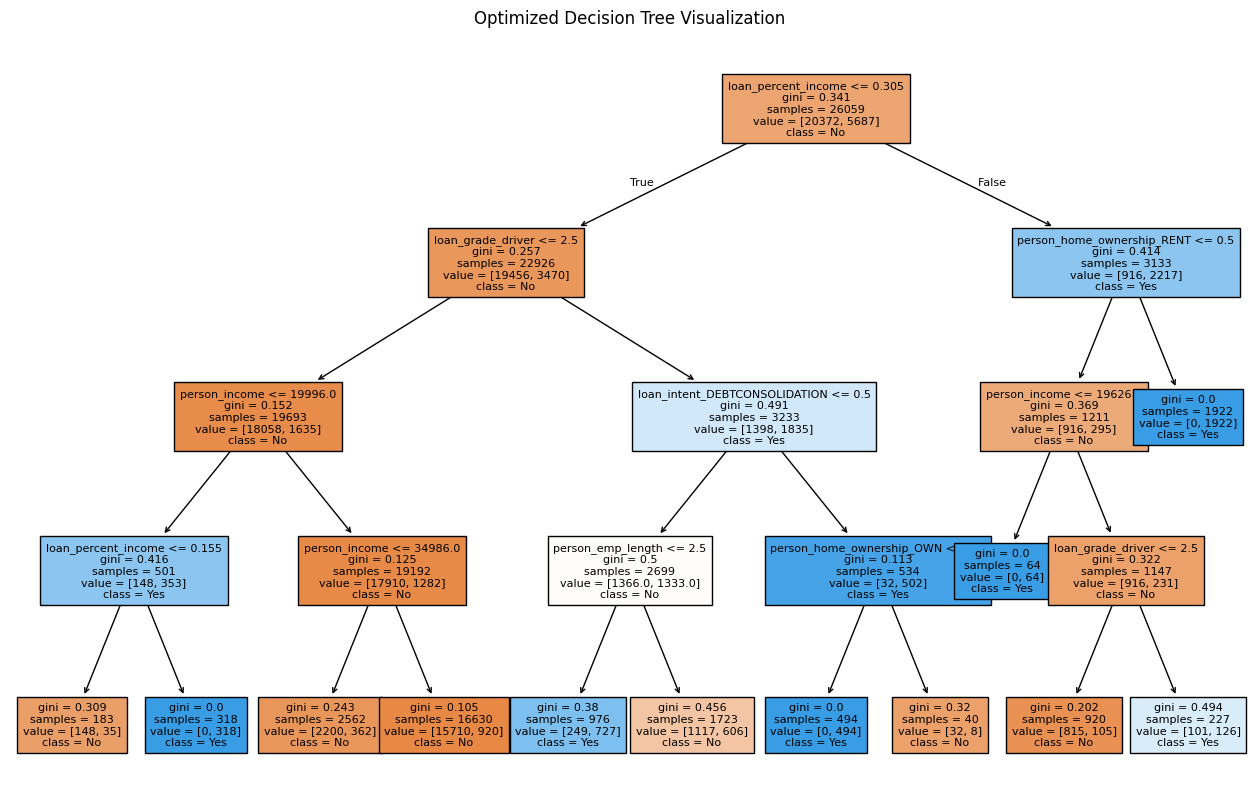

,Drivers,Importance
0,person_home_ownership_OWN,0.009459
1,person_home_ownership_RENT,0.169761
2,loan_intent_DEBTCONSOLIDATION,0.035446
3,loan_intent_EDUCATION,0.000000
4,loan_intent_VENTURE,0.000000
5,loan_grade_B,0.000000
6,loan_grade_E,0.000000
7,loan_grade_driver,0.274562
8,person_income,0.101318
9,person_emp_length,0.038466


In [462]:
#We want to be strict with the decision tree parameters so that we do not result in a complex decision tree, which may overfit the data and lose interpretability. 

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [2, 3, 4],             # Test different tree depths
    'min_samples_split': [10, 50, 100],           # Test different values for min samples to split
    'min_samples_leaf': [10, 50, 100],            # Test different values for min samples per leaf
    'max_features': ['auto', 'sqrt', 'log2', None]  # Test different values for max features
}

# Initialize the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using GridSearchCV to find the best parameters
grid_search.fit(train[riskdriver_cat_columns + riskdriver_num_columns], train[target_column[0]])

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best Parameters from Grid Search: {best_params}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Predictions
train_preds = best_model.predict(train[riskdriver_cat_columns + riskdriver_num_columns])
test_preds = best_model.predict(test[riskdriver_cat_columns + riskdriver_num_columns])

# Get predicted probabilities for AUC calculation
train_probs = best_model.predict_proba(train[riskdriver_cat_columns + riskdriver_num_columns])[:, 1]
test_probs = best_model.predict_proba(test[riskdriver_cat_columns + riskdriver_num_columns])[:, 1]

# Confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, preds, dataset, title in zip(axes, [train_preds, test_preds], [train, test], ["Train", "Test"]):
    cm = confusion_matrix(dataset[target_column[0]], preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap="Blues", ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    
plt.show()

# Classification report
print("Train Set Performance:")
print(classification_report(train[target_column[0]], train_preds))

print("Test Set Performance:")
print(classification_report(test[target_column[0]], test_preds))

# Gini calculation
auc_train = roc_auc_score(train[target_column[0]], train_probs)
auc_test = roc_auc_score(test[target_column[0]], test_probs)

gini_train = gini_from_auc(auc_train)
gini_test = gini_from_auc(auc_test)

print(f"Train Gini: {gini_train:.4f}")
print(f"Test Gini: {gini_test:.4f}")

# Plot the optimized Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(best_model, feature_names=riskdriver_cat_columns + riskdriver_num_columns, class_names=["No", "Yes"], filled=True, fontsize=8)
plt.title("Optimized Decision Tree Visualization")
plt.show()

importance_df = pd.DataFrame()
importance_df["Drivers"] = riskdriver_cat_columns + riskdriver_num_columns
importance_df["Importance"] = best_model.feature_importances_
importance_df

In [452]:
#We see some overlap with the logistic regression model
selected_riskdrivers

['loan_percent_income',
 'loan_grade_driver',
 'person_home_ownership_RENT',
 'person_income']

#### Random forest

/Users/shemkatz/Documents/code/credit_risk/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shemkatz/Documents/code/credit_risk/.venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shemkatz/Documents/code/credit_risk/.venv/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/shemkatz/Documents/code/credit_risk/.venv/lib/python3.9/site-pack

Best Parameters from Grid Search (Random Forest): {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 50}


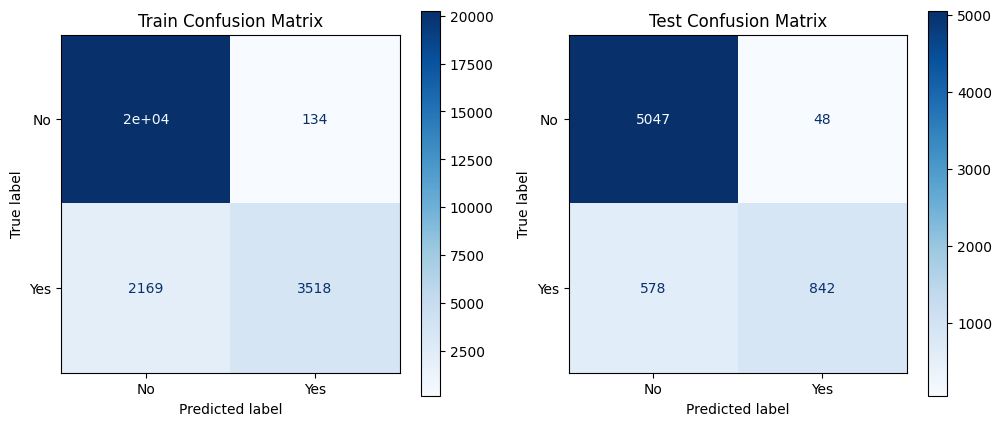

Train Set Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     20372
           1       0.96      0.62      0.75      5687

    accuracy                           0.91     26059
   macro avg       0.93      0.81      0.85     26059
weighted avg       0.92      0.91      0.90     26059

Test Set Performance (Random Forest):
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      5095
           1       0.95      0.59      0.73      1420

    accuracy                           0.90      6515
   macro avg       0.92      0.79      0.84      6515
weighted avg       0.91      0.90      0.90      6515

Train Gini (Random Forest): 0.7981
Test Gini (Random Forest): 0.7592


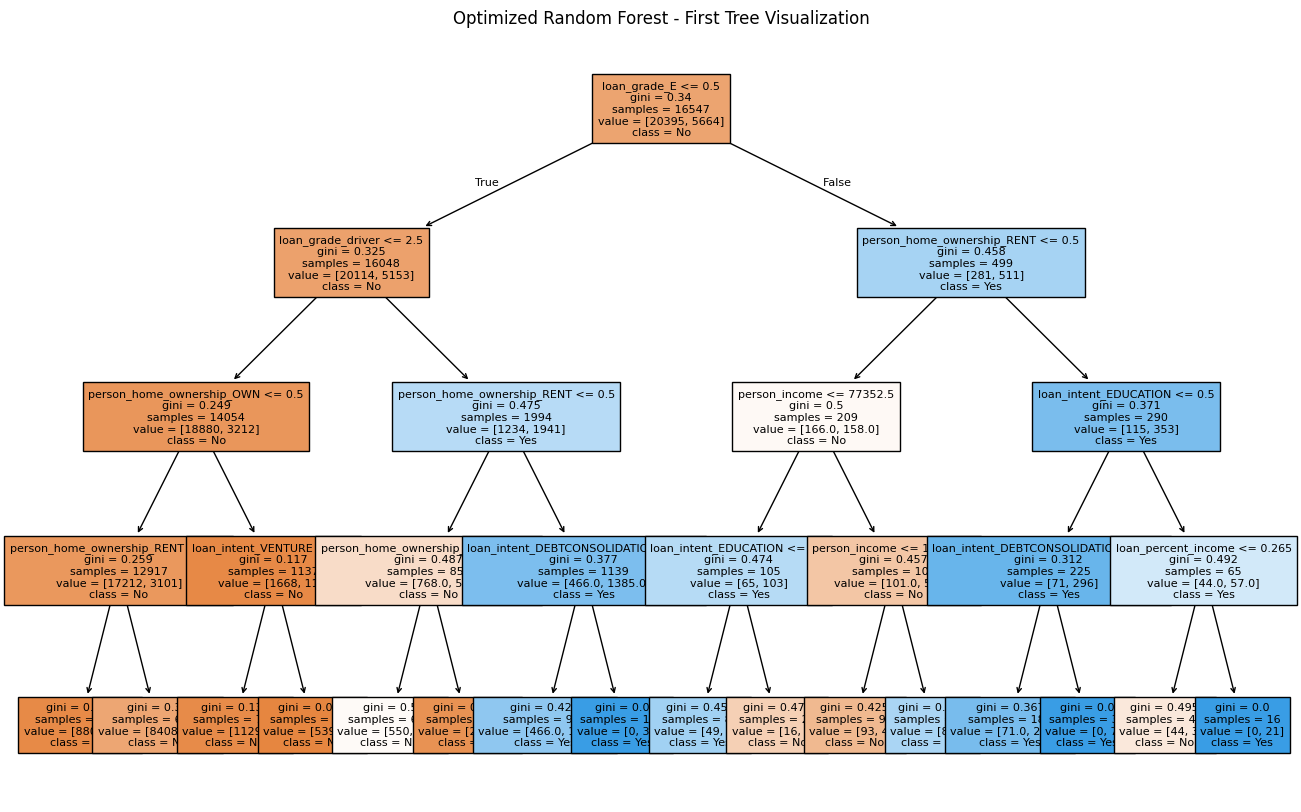

,Drivers,Importance
0,person_home_ownership_OWN,0.020658
1,person_home_ownership_RENT,0.127322
2,loan_intent_DEBTCONSOLIDATION,0.017974
3,loan_intent_EDUCATION,0.004317
4,loan_intent_VENTURE,0.002820
5,loan_grade_B,0.006463
6,loan_grade_E,0.028539
7,loan_grade_driver,0.302669
8,person_income,0.134914
9,person_emp_length,0.014681


In [461]:

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [2, 3, 4],                    # Test different tree depths
    'min_samples_split': [10, 50, 100],       # Minimum samples required to split an internal node
    'min_samples_leaf': [10, 50, 100],         # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using GridSearchCV to find the best parameters
grid_search_rf.fit(train[riskdriver_cat_columns + riskdriver_num_columns], train[target_column[0]])

# Get the best parameters from GridSearchCV
best_params_rf = grid_search_rf.best_params_
print(f"Best Parameters from Grid Search (Random Forest): {best_params_rf}")

# Train the model with the best parameters
best_rf_model = grid_search_rf.best_estimator_

# Predictions
train_preds_rf = best_rf_model.predict(train[riskdriver_cat_columns + riskdriver_num_columns])
test_preds_rf = best_rf_model.predict(test[riskdriver_cat_columns + riskdriver_num_columns])

# Get predicted probabilities for AUC calculation
train_probs_rf = best_rf_model.predict_proba(train[riskdriver_cat_columns + riskdriver_num_columns])[:, 1]
test_probs_rf = best_rf_model.predict_proba(test[riskdriver_cat_columns + riskdriver_num_columns])[:, 1]

# Confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, preds, dataset, title in zip(axes, [train_preds_rf, test_preds_rf], [train, test], ["Train", "Test"]):
    cm = confusion_matrix(dataset[target_column[0]], preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap="Blues", ax=ax)
    ax.set_title(f"{title} Confusion Matrix")
    
plt.show()

# Classification report
print("Train Set Performance (Random Forest):")
print(classification_report(train[target_column[0]], train_preds_rf))

print("Test Set Performance (Random Forest):")
print(classification_report(test[target_column[0]], test_preds_rf))

# Gini calculation
auc_train_rf = roc_auc_score(train[target_column[0]], train_probs_rf)
auc_test_rf = roc_auc_score(test[target_column[0]], test_probs_rf)

gini_train_rf = gini_from_auc(auc_train_rf)
gini_test_rf = gini_from_auc(auc_test_rf)

print(f"Train Gini (Random Forest): {gini_train_rf:.4f}")
print(f"Test Gini (Random Forest): {gini_test_rf:.4f}")

# Plot the optimized Random Forest trees (first tree from the forest)
plt.figure(figsize=(16, 10))
plot_tree(best_rf_model.estimators_[0], feature_names=riskdriver_cat_columns + riskdriver_num_columns, class_names=["No", "Yes"], filled=True, fontsize=8)
plt.title("Optimized Random Forest - First Tree Visualization")
plt.show()

importance_df = pd.DataFrame()
importance_df["Drivers"] = riskdriver_cat_columns + riskdriver_num_columns
importance_df["Importance"] = best_rf_model.feature_importances_
importance_df

### Some suggestions for improvement and things to consider whilst developing an IRB model